In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
df = pd.read_csv('historical_ywse_cleaned.csv')
def map_season(season):
    return '1' if season == 'Summer' else ('2' if season == 'Autumn' else '3')

df['year_season'] = df.apply(lambda row: str(row['year']) + '_' + map_season(row['season']) + '_' + row['season'], axis=1)
df = df.sort_values('year_season')

### Running SARIMA on state level

In [3]:
# Running for only crops that have total yield > 1000 Ton./Ha.
# Define ranges for p, d, q parameters
p_values = range(0, 3) 
d_values = range(0, 2) 
q_values = range(0, 3) 
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [3]

# Initialize variables to store best parameters and best RMSE for each crop
best_params = {}
best_rmse = {}
best_rmse_crop = {}

crops = ['Sugarcane', 'Maize', 'Rice']
states = df['state'].unique()

# Iterate over each crop
for crop in crops:
    # Filter data for the current crop
    crop_data = df[df['crop'] == crop]
    
    for state in states:
        
        crop_state_data = crop_data[crop_data["state"] == state]

        # Prepare train and test data for the current crop
        train_data = crop_state_data[crop_state_data['year'] <= 2018].groupby(['year_season'])['yield'].sum()
        true_values = crop_state_data[(crop_state_data['year'] >= 2019)].groupby(['year_season'])['yield'].sum()
        
        best_params[(crop, state)] = None
        best_rmse[(crop, state)] = float('inf')
        
        for p, d, q, P, D, Q, s in product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
            if p == 0 and d == 0 and q == 0 and P == 0 and D == 0 and Q == 0:
                continue
            
            # Train SARIMAX model
            order = (p, d, q)
            seasonal_order = (P, D, Q, s)
            model = SARIMAX(train_data.values, order=order, seasonal_order=seasonal_order)
            try:
                fit_model = model.fit()
                forecast = fit_model.forecast(steps=len(true_values))
                rmse = np.sqrt(mean_squared_error(true_values, forecast))
                if rmse < best_rmse[(crop, state)]:
                    best_rmse[(crop, state)] = rmse
                    best_params[(crop, state)] = (order, seasonal_order)
            except:
                continue

# Best parameters for each crop
print("crop: Best parameters")
for k,v in best_params.items():
    print(k, ": ", v)

# RMSE for each crop in each state
print('\nBy state level:')
print("crop: rmse")
for k, v in best_rmse.items():
    print(k, ": ", v)

## RMSE for each crop
print('\nBy national level:')
print("crop: rmse")
for k, v in best_rmse.items():
    if v != float('inf'):
      best_rmse_crop[k[0]] = best_rmse_crop.get(k[0], 0) + v
for k, v in best_rmse_crop.items():
    print(k, ": ", v)

# Total RMSE across Sugarcane, Maize and Rice
total_rmse = sum(best_rmse_crop.values())
print("Total Root Mean Squared Error (RMSE) across Sugarcane, Maize, Rice:", total_rmse)

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal mo

crop: Best parameters
('Sugarcane', 'Andaman and Nicobar Islands') :  ((0, 0, 1), (0, 1, 0, 3))
('Sugarcane', 'West Bengal') :  None
('Sugarcane', 'Puducherry') :  None
('Sugarcane', 'Manipur') :  ((0, 0, 0), (0, 1, 0, 3))
('Sugarcane', 'Karnataka') :  None
('Sugarcane', 'Uttarakhand') :  None
('Sugarcane', 'Uttar Pradesh') :  None
('Sugarcane', 'Odisha') :  None
('Sugarcane', 'Madhya Pradesh') :  None
('Sugarcane', 'Jharkhand') :  None
('Sugarcane', 'Meghalaya') :  ((0, 0, 2), (1, 0, 1, 3))
('Sugarcane', 'Gujarat') :  None
('Sugarcane', 'Dadra and Nagar Haveli') :  ((2, 0, 2), (0, 0, 1, 3))
('Sugarcane', 'Kerala') :  None
('Sugarcane', 'Bihar') :  None
('Sugarcane', 'Chhattisgarh') :  None
('Sugarcane', 'Mizoram') :  None
('Sugarcane', 'Tripura') :  None
('Sugarcane', 'Tamil Nadu') :  None
('Sugarcane', 'Assam') :  None
('Sugarcane', 'Maharashtra') :  None
('Maize', 'Andaman and Nicobar Islands') :  None
('Maize', 'West Bengal') :  ((2, 0, 2), (1, 0, 0, 3))
('Maize', 'Puducherry') :  

### Running SARIMA on national level

In [4]:
p_values = range(0, 3) 
d_values = range(0, 2) 
q_values = range(0, 3) 
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [3]

best_params = {}
best_rmse = {}

crops = df['crop'].unique()

# Iterate over each crop
for crop in crops:
    # Filter data for the current crop
    crop_data = df[df['crop'] == crop]
    
    # Prepare train and test data for the current crop
    train_data = crop_data[crop_data['year'] <= 2018].groupby(['year_season'])['yield'].sum()
    true_values = crop_data[(crop_data['year'] >= 2019)].groupby(['year_season'])['yield'].sum()
    
    # Initialize variables to store best parameters and best RMSE for the current crop
    best_params[crop] = None
    best_rmse[crop] = float('inf')
    
    # Perform grid search for the current crop
    for p, d, q, P, D, Q, s in product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
        if p == 0 and d == 0 and q == 0 and P == 0 and D == 0 and Q == 0:
            continue
        
        # Train SARIMAX model
        order = (p, d, q)
        seasonal_order = (P, D, Q, s)
        model = SARIMAX(train_data.values, order=order, seasonal_order=seasonal_order)
        try:
            fit_model = model.fit()
            forecast = fit_model.forecast(steps=len(true_values))
            rmse = np.sqrt(mean_squared_error(true_values, forecast))
            if rmse < best_rmse[crop]:
                best_rmse[crop] = rmse
                best_params[crop] = (order, seasonal_order)
        except:
            continue

# Best parameters for each crop
print("crop: Best parameters")
for k,v in best_params.items():
    print(k, ": ", v)

# RMSE for each crop
print("\ncrop: rmse")
for k, v in best_rmse.items():
    print(k, ": ", v)

# Total RMSE across Sugarcane, Maize and Rice
smr_rmse = best_rmse['Sugarcane'] + best_rmse['Maize'] + best_rmse['Rice']
print("Total Root Mean Squared Error (RMSE) across Sugarcane, Maize, Rice:", smr_rmse)

# Total RMSE across all crops
total_rmse = sum(best_rmse.values())
print("Total Root Mean Squared Error (RMSE) across all crops:", total_rmse)

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting 

crop: Best parameters
Sesamum :  ((1, 0, 1), (1, 0, 1, 3))
Dry Chillies :  ((1, 1, 0), (0, 1, 0, 3))
Cowpea :  ((0, 1, 0), (1, 0, 0, 3))
Cotton :  ((0, 0, 0), (0, 1, 0, 3))
Urad :  ((0, 1, 0), (1, 0, 0, 3))
Horse-gram :  ((2, 0, 0), (1, 0, 0, 3))
Groundnut :  ((1, 0, 0), (1, 0, 0, 3))
Bajra :  ((2, 1, 0), (1, 0, 1, 3))
Rapeseed & Mustard :  ((2, 1, 1), (1, 0, 1, 3))
Sugarcane :  ((1, 0, 2), (0, 0, 0, 3))
Jute :  ((1, 1, 0), (1, 1, 1, 3))
Ginger :  ((0, 0, 0), (0, 1, 0, 3))
Banana :  ((2, 0, 2), (1, 0, 0, 3))
Ragi :  ((0, 1, 0), (1, 0, 0, 3))
Potato :  ((1, 0, 1), (1, 0, 0, 3))
Peas & Beans :  ((0, 0, 0), (0, 1, 0, 3))
Jowar :  ((0, 0, 2), (0, 0, 1, 3))
Sunflower :  ((1, 1, 0), (1, 0, 0, 3))
Maize :  ((1, 1, 2), (1, 1, 0, 3))
Rice :  ((1, 1, 0), (1, 0, 0, 3))
Onion :  ((0, 0, 0), (1, 0, 0, 3))
Moong :  ((1, 1, 0), (1, 0, 0, 3))
Niger seed :  ((0, 0, 0), (1, 0, 0, 3))
Other Summer Pulses :  ((2, 0, 1), (0, 0, 1, 3))
Gram :  ((0, 0, 0), (0, 1, 0, 3))
Arhar/Tur :  ((1, 0, 1), (0, 0, 0, 3))

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Plotting SARIMA graph

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


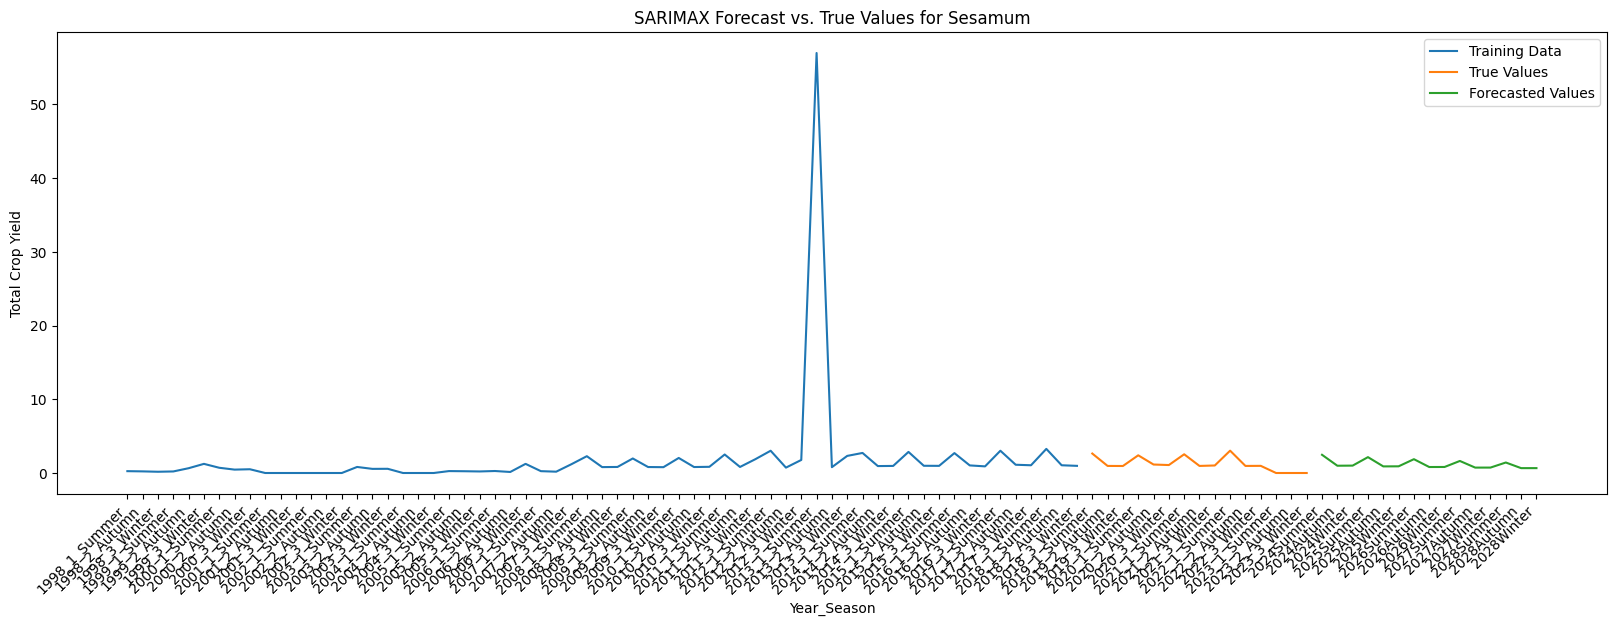

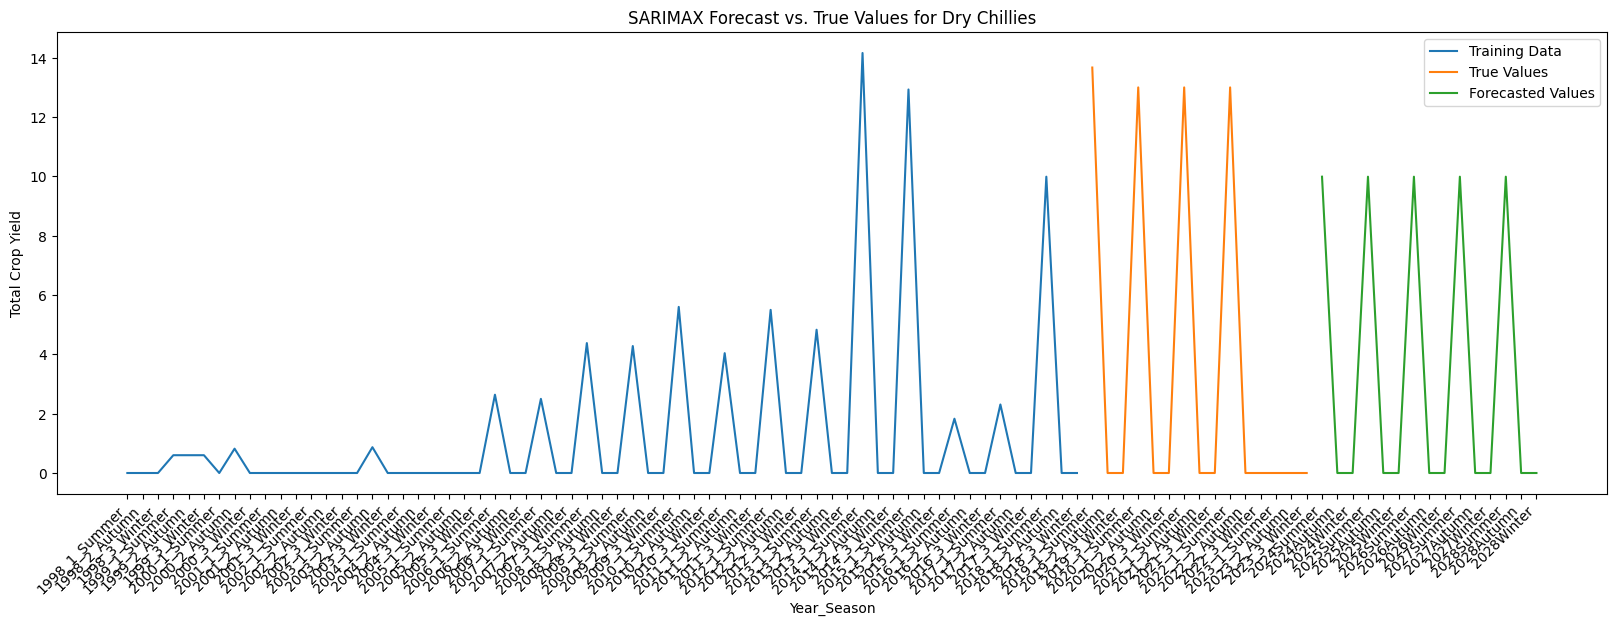

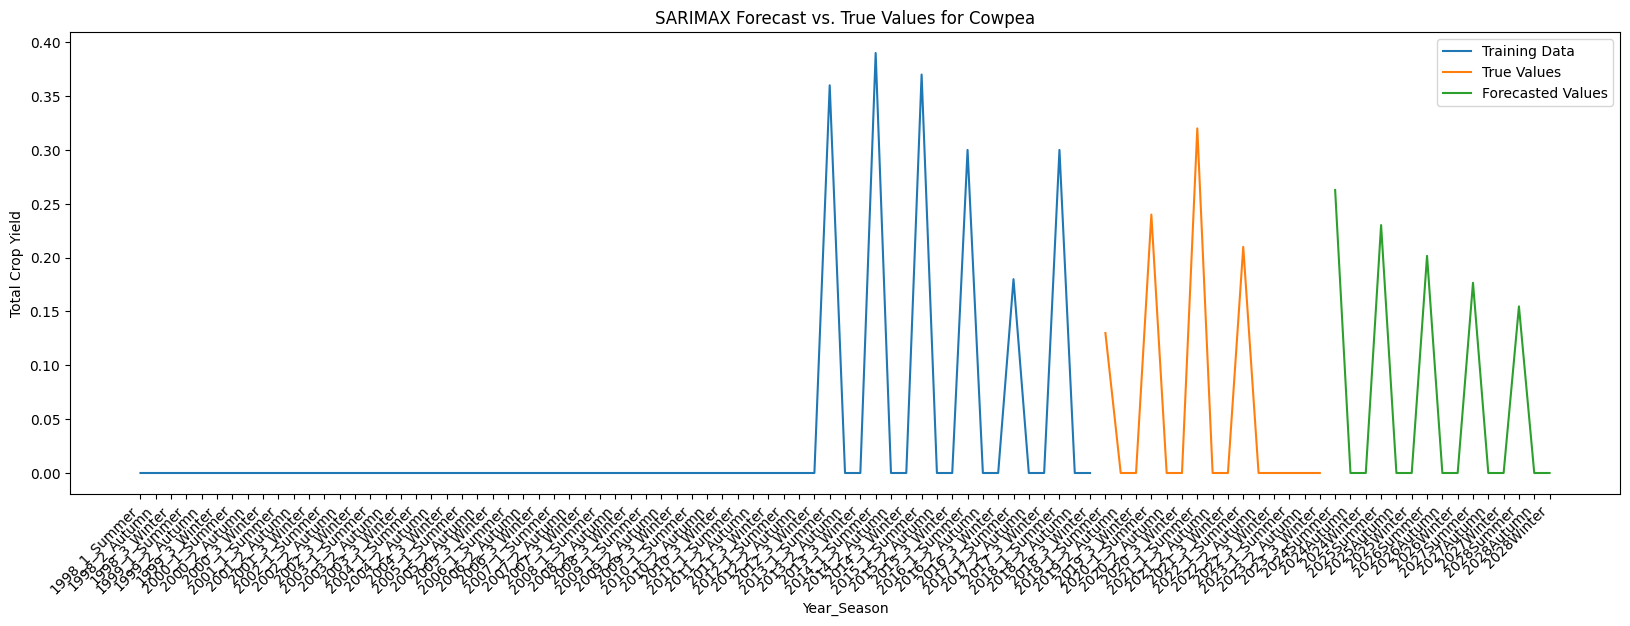

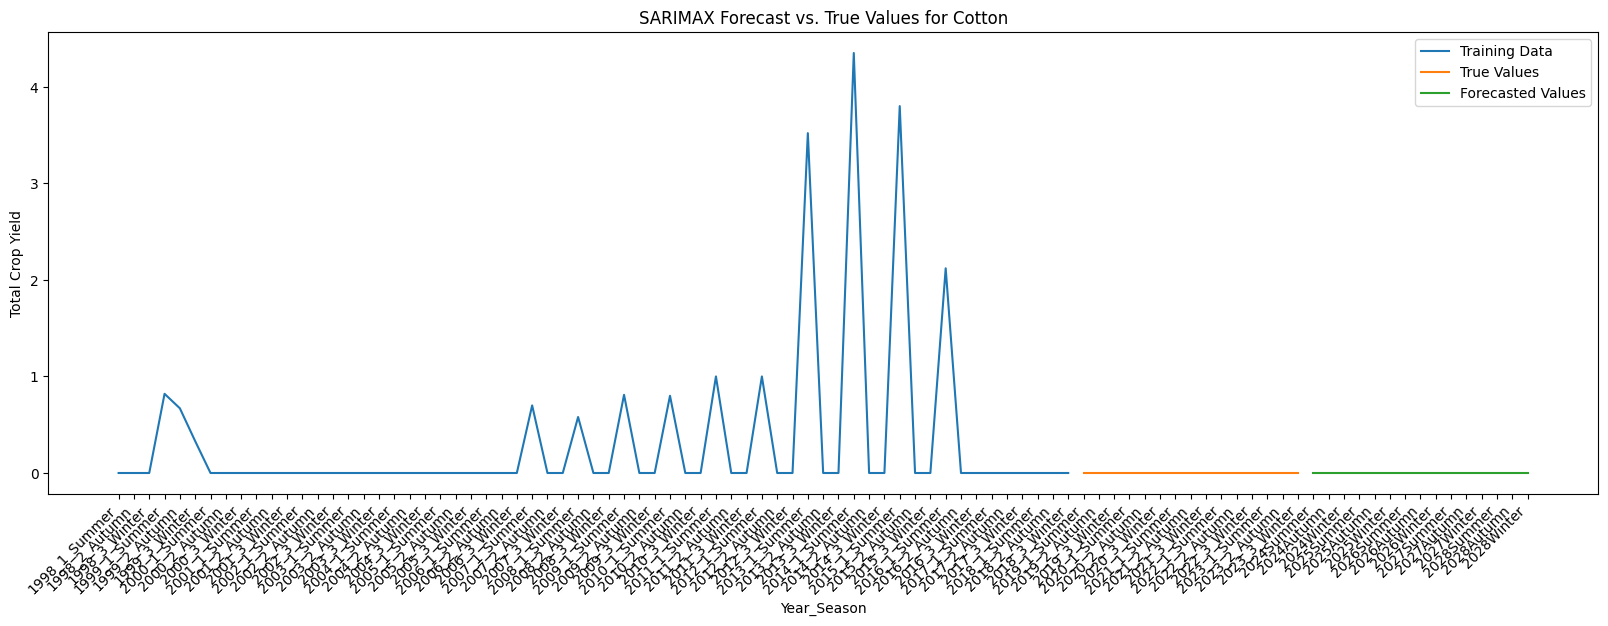

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


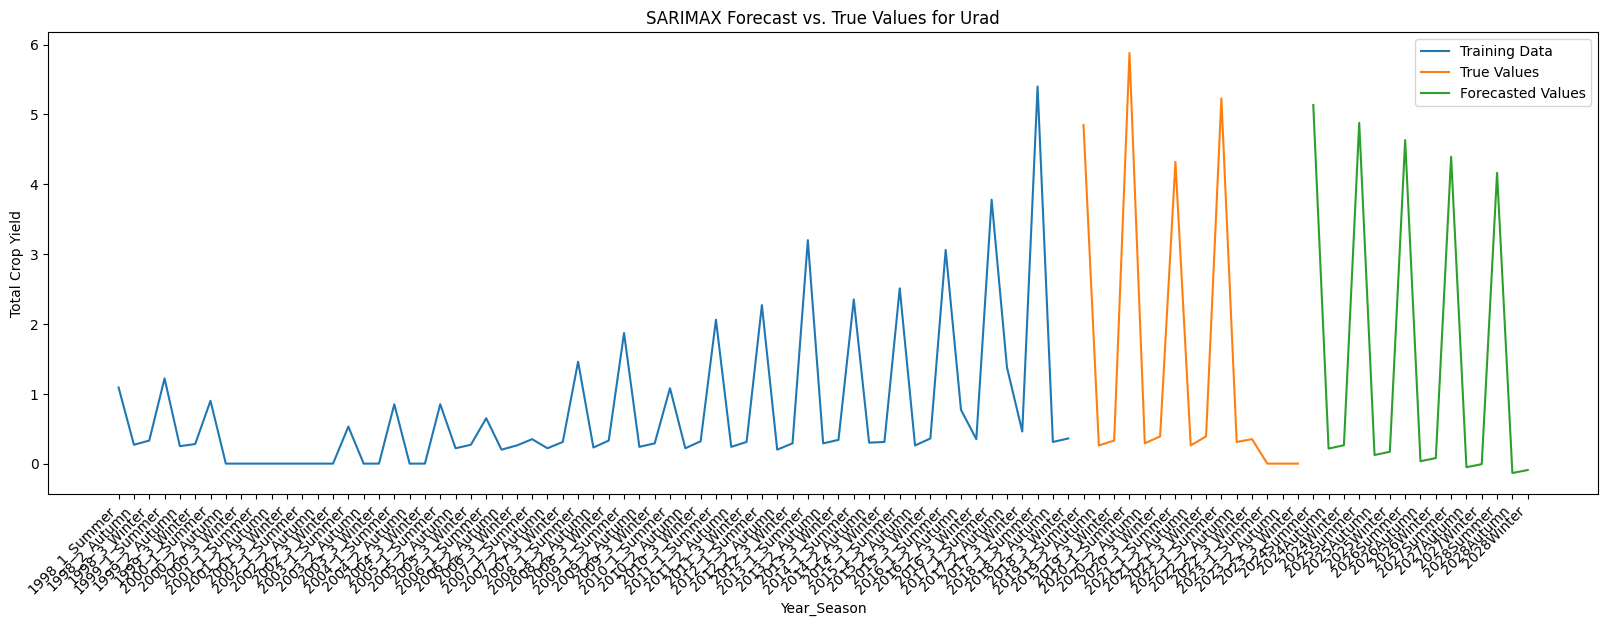

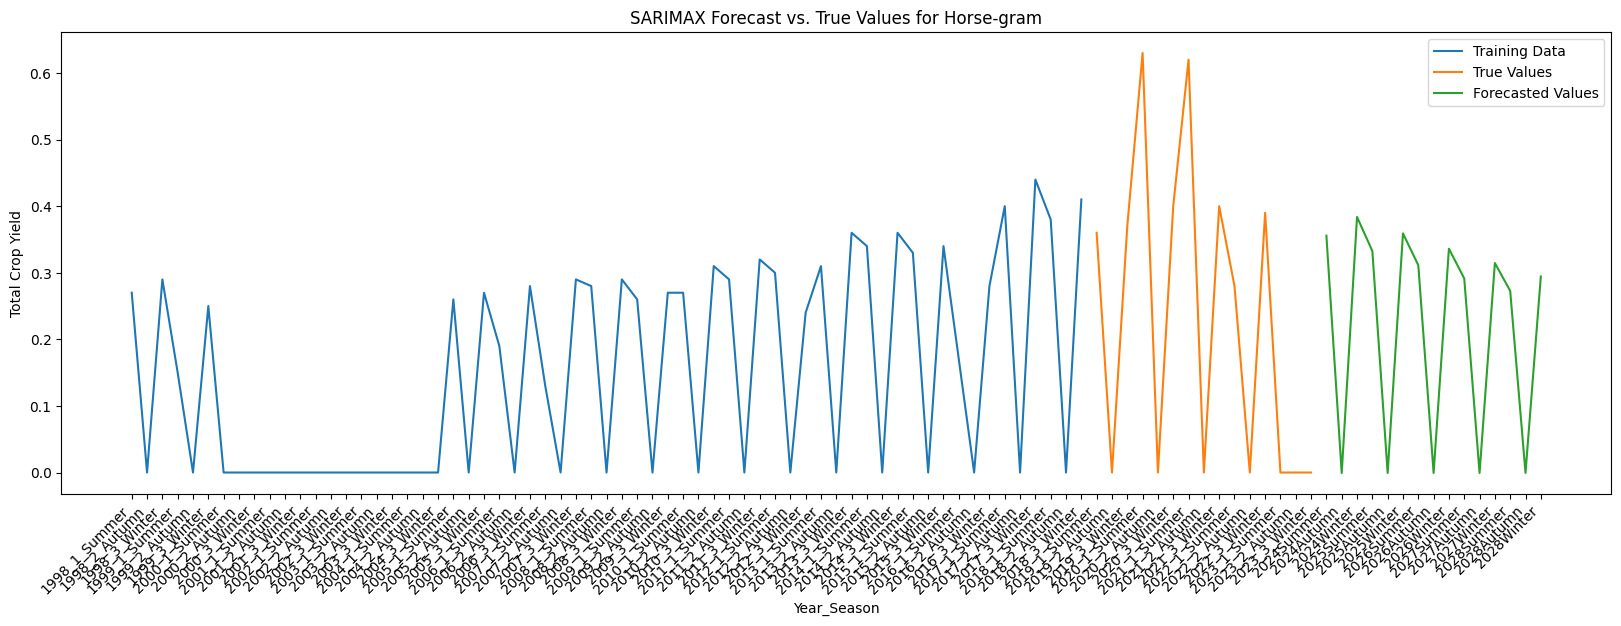

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


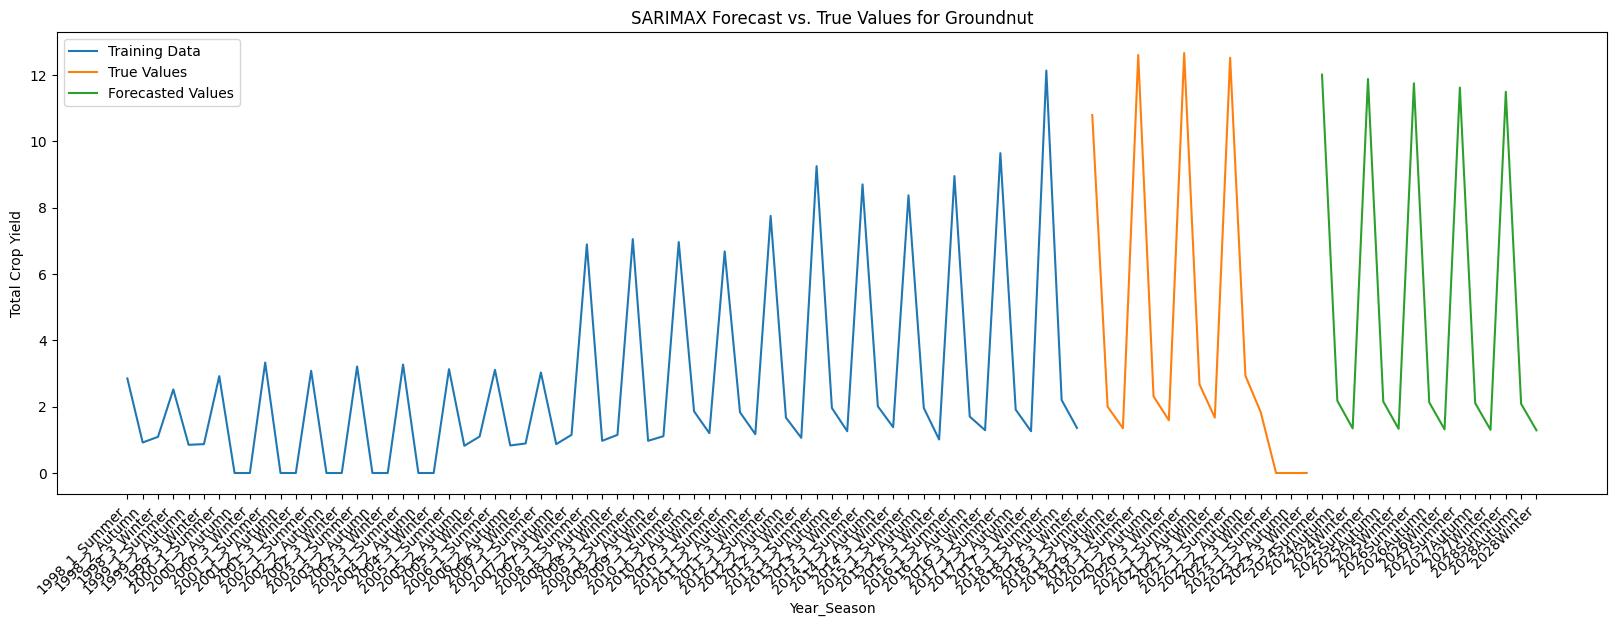

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

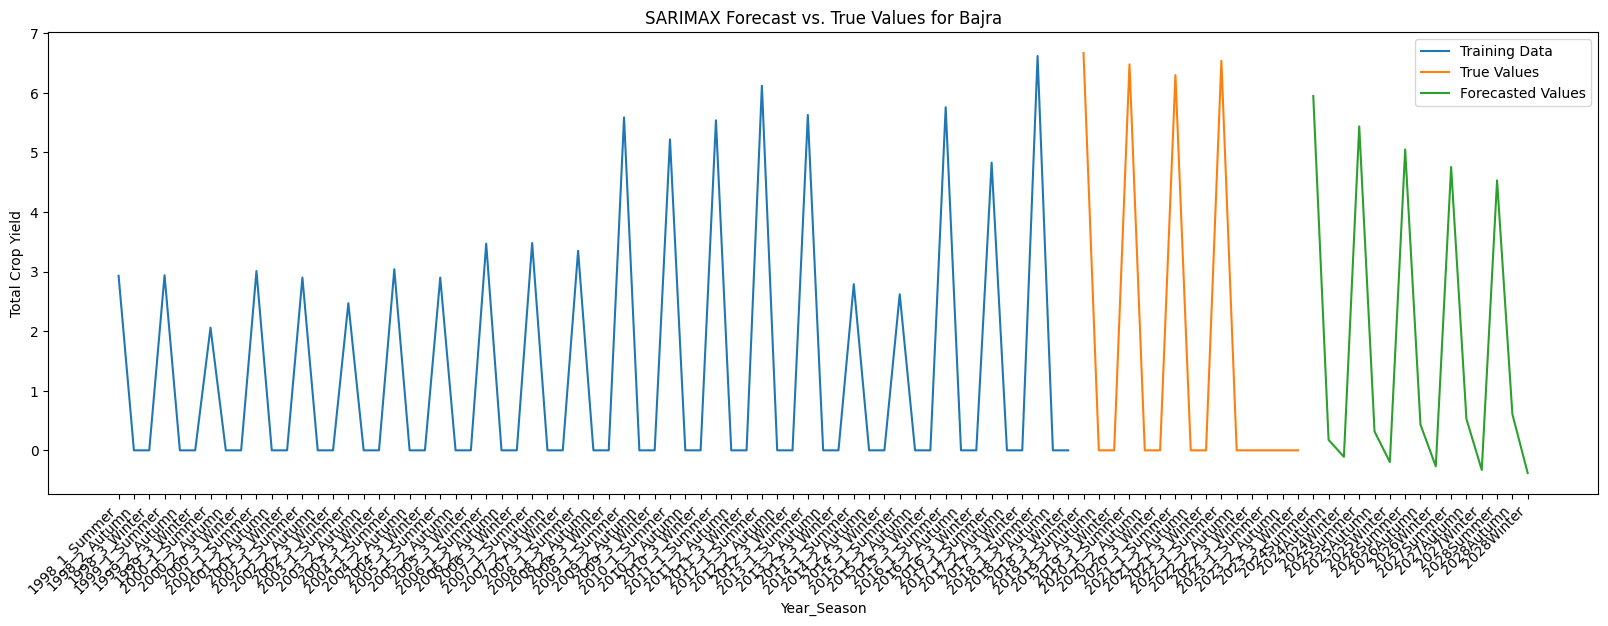

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


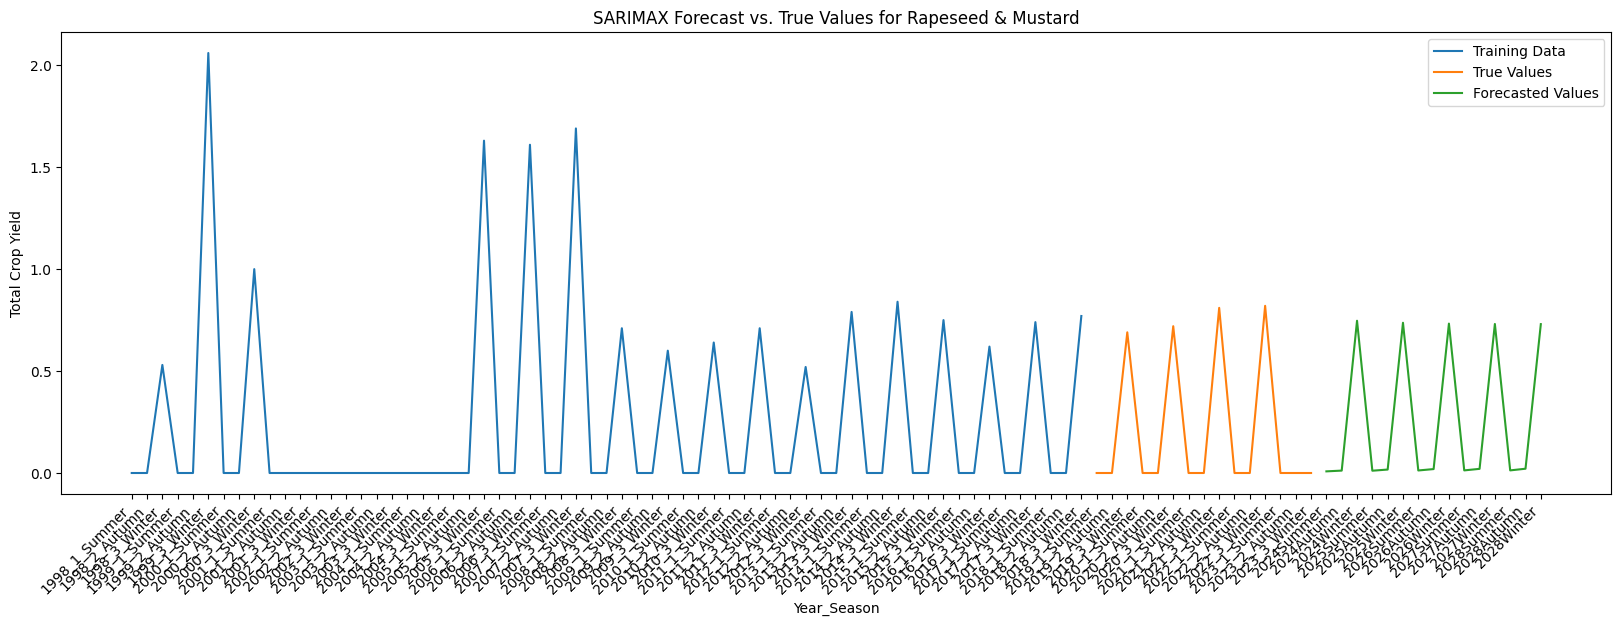

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


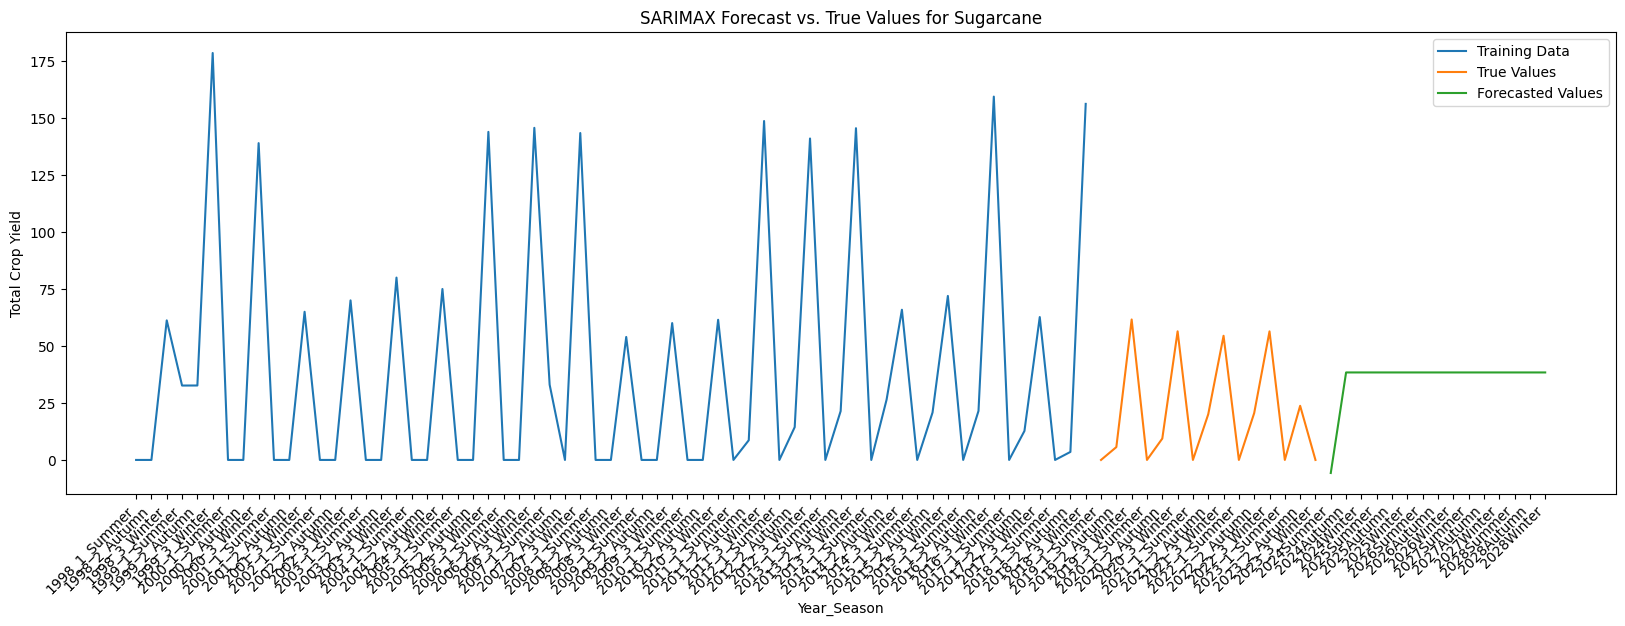

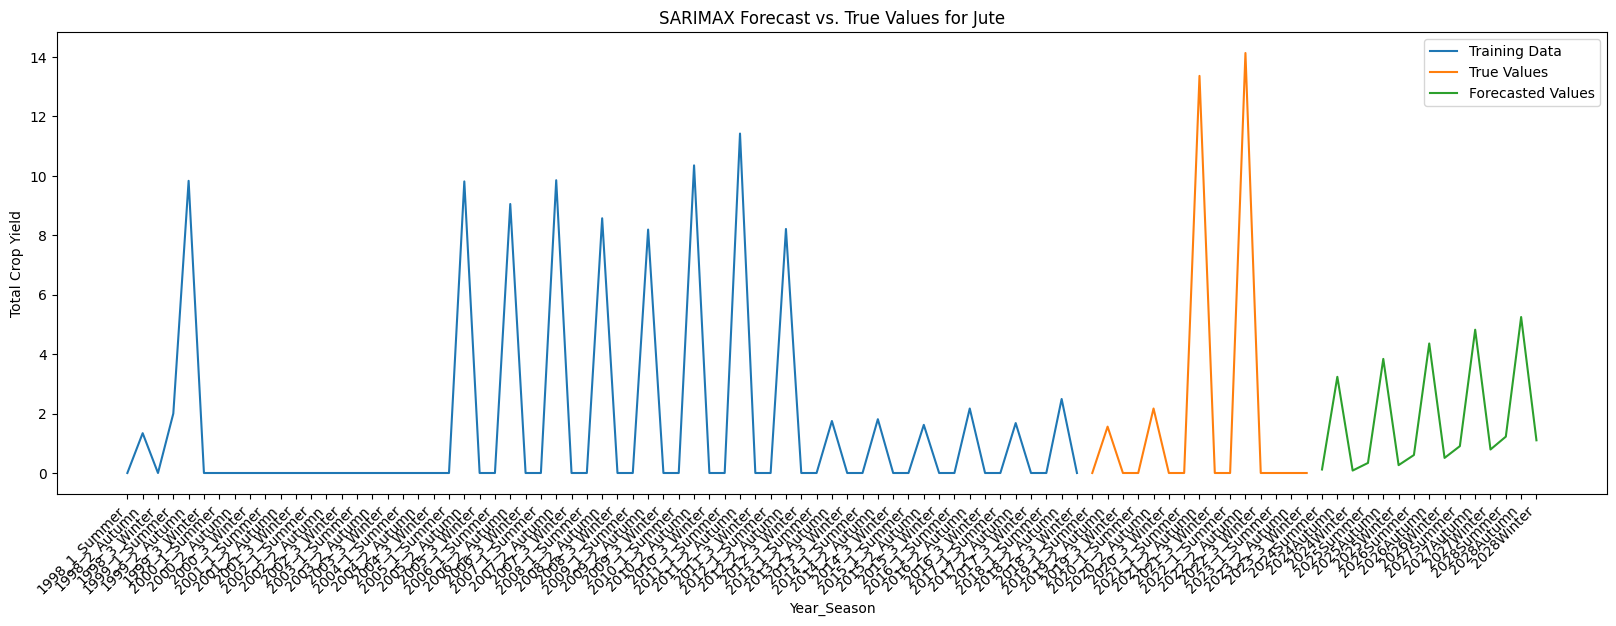

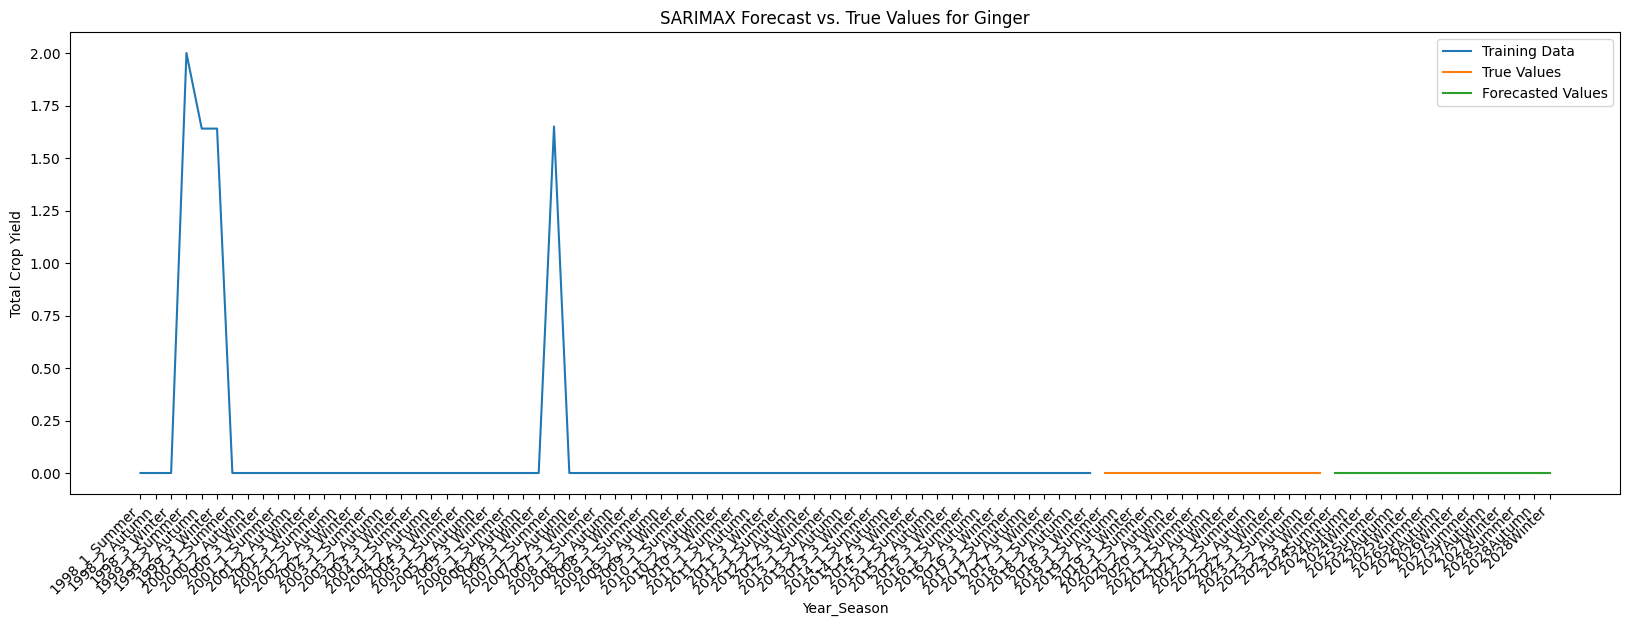

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


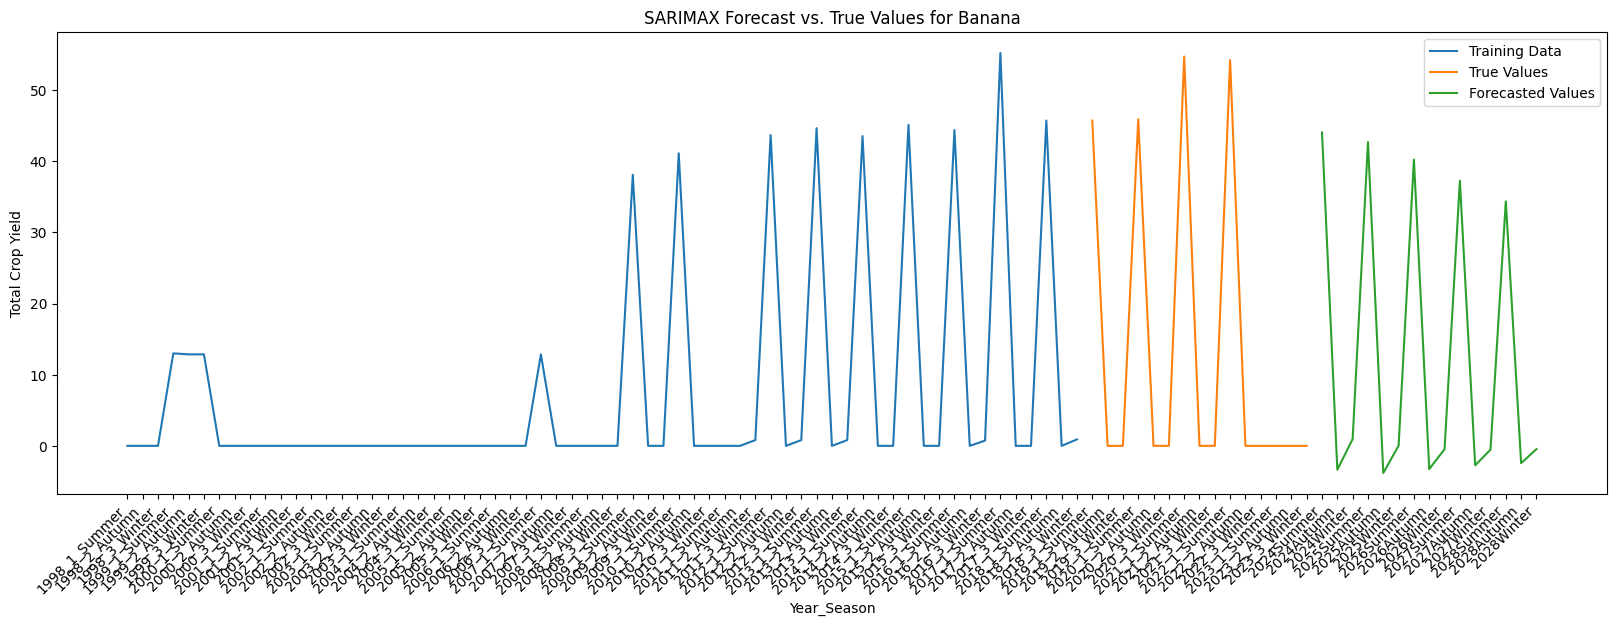

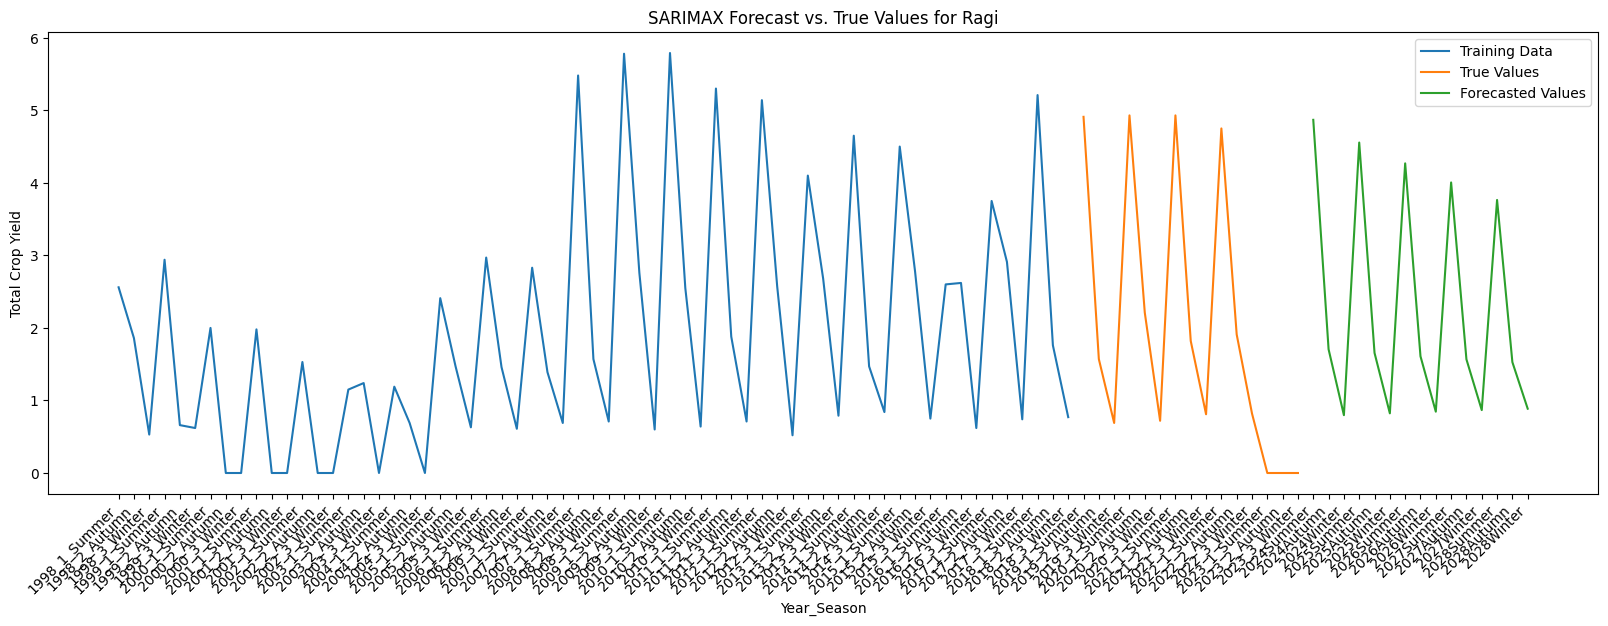

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


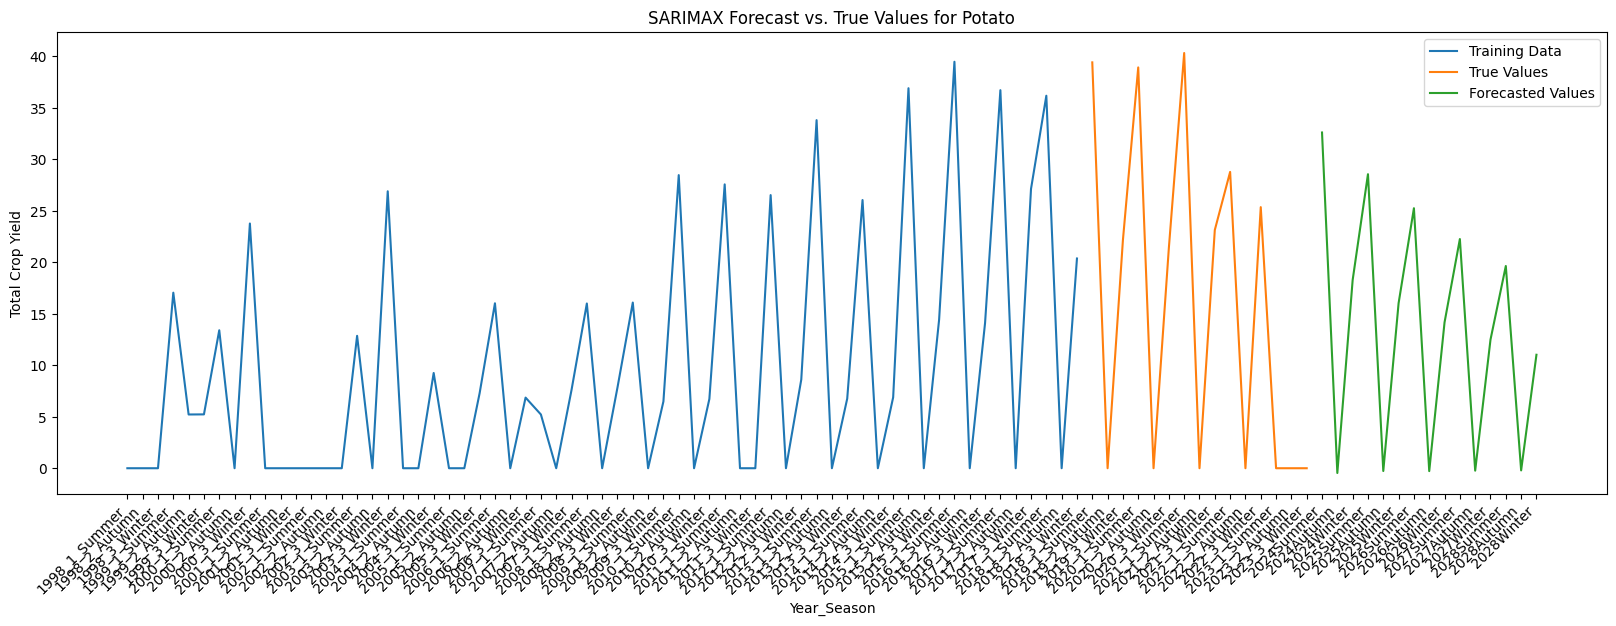

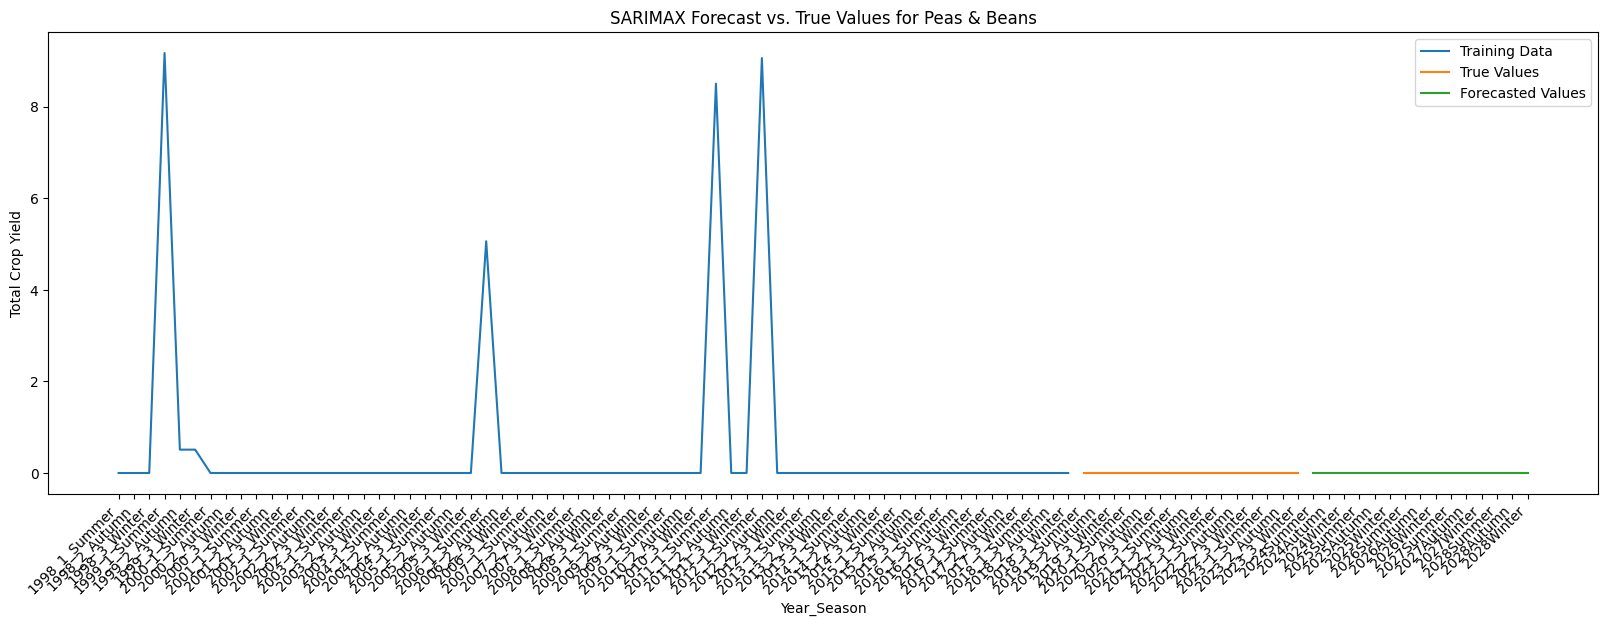

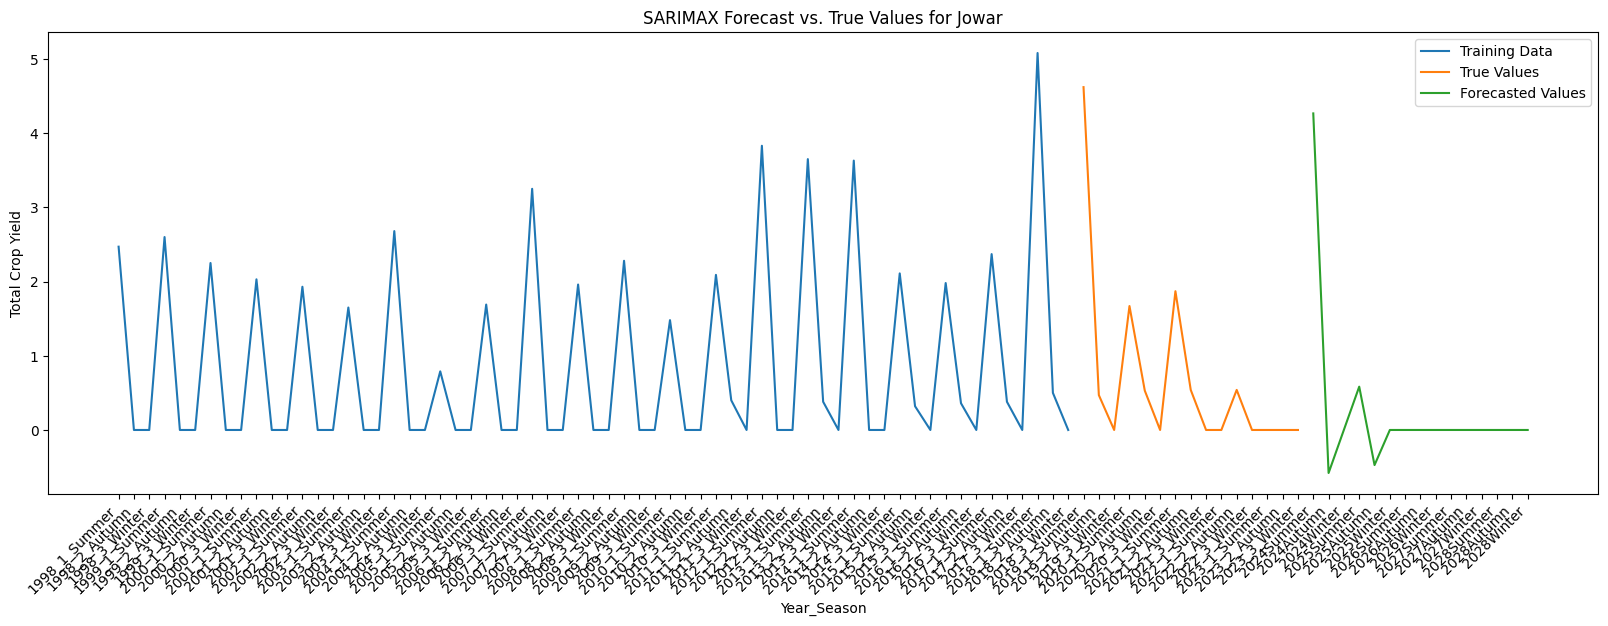

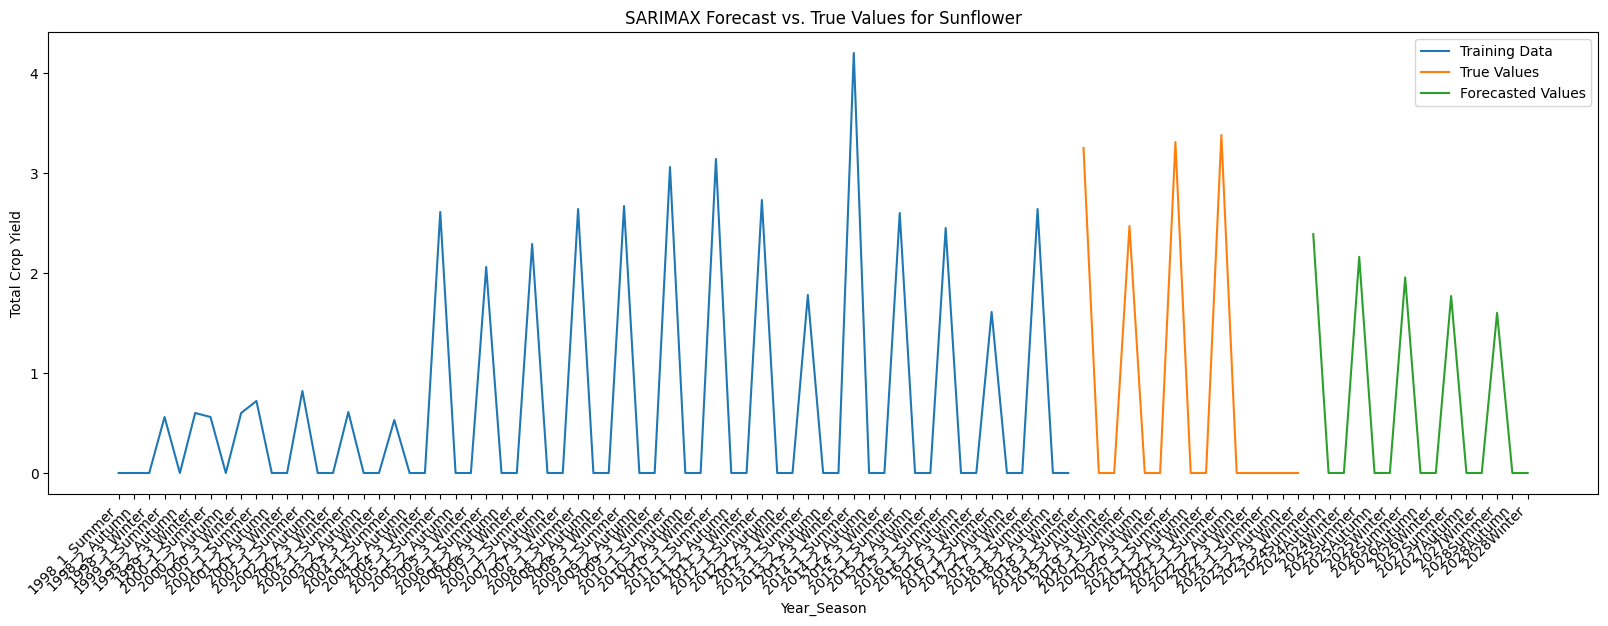

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


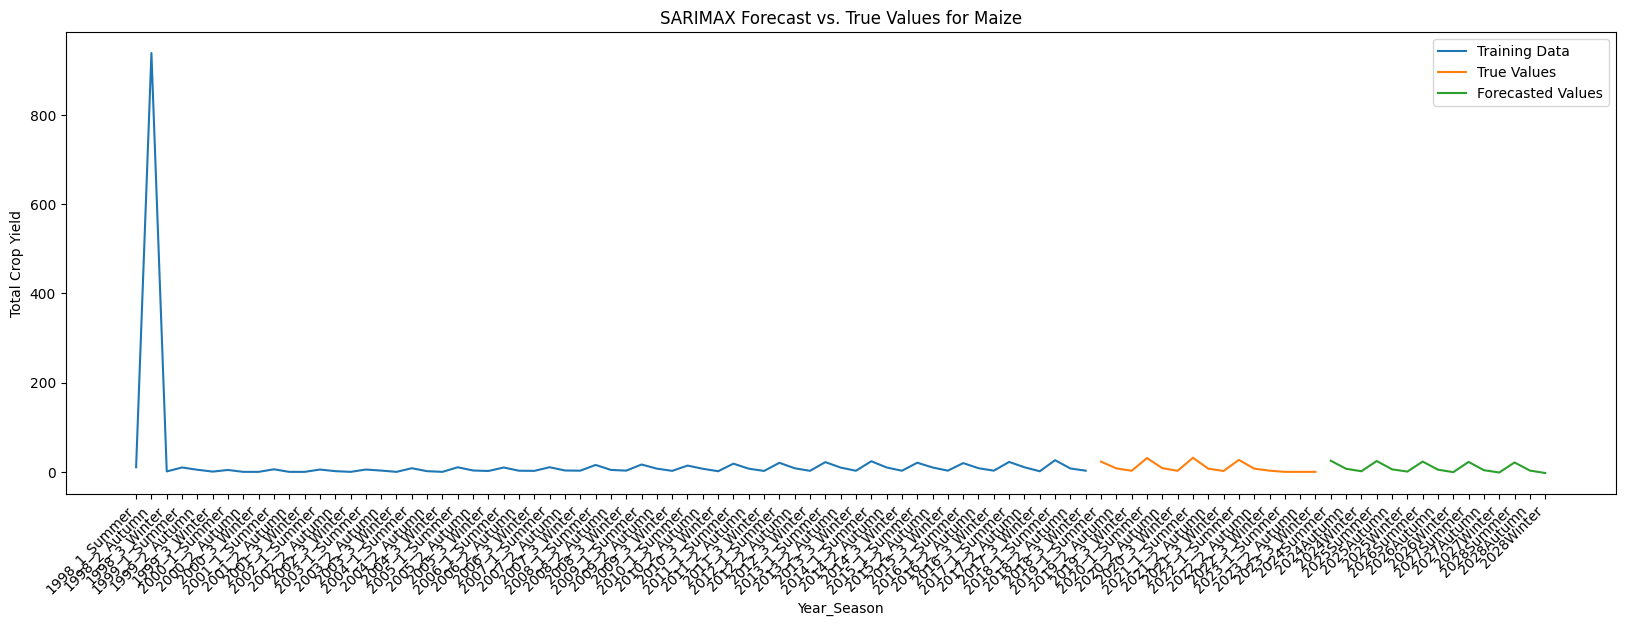

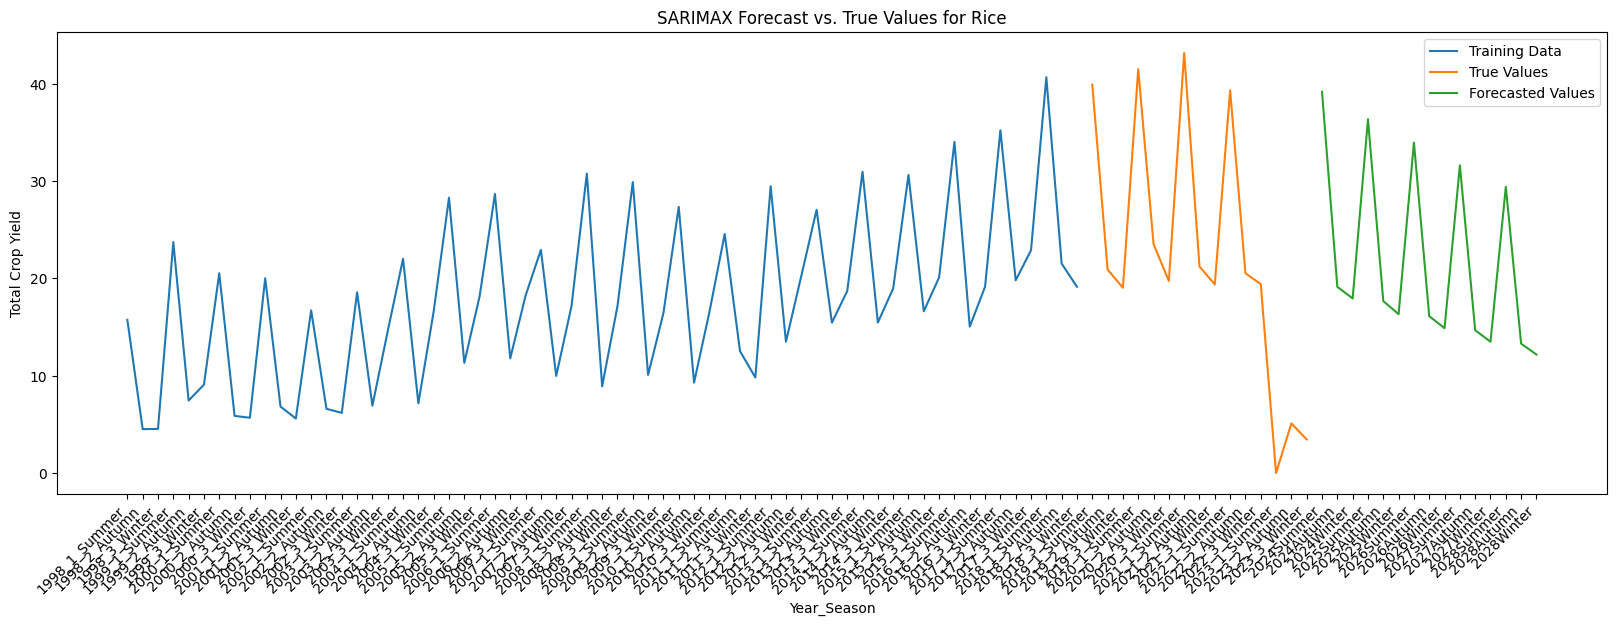

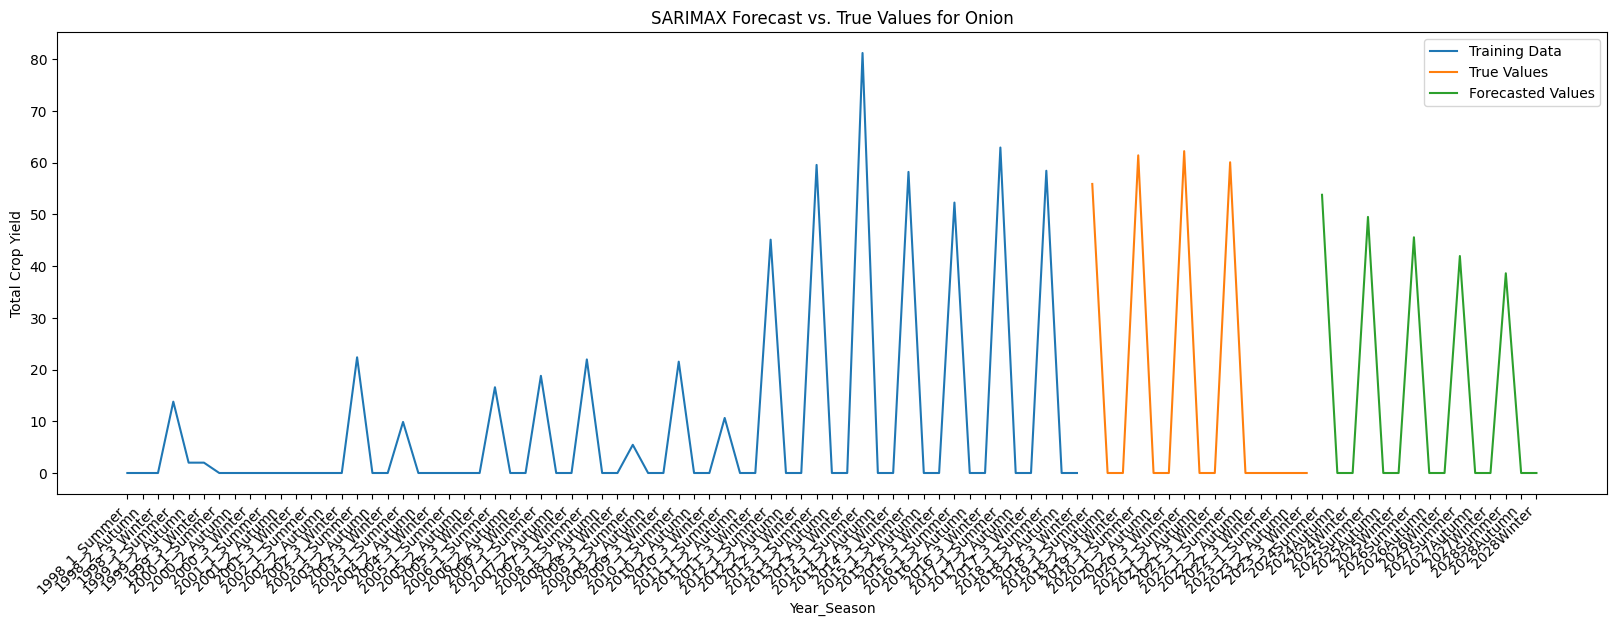

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


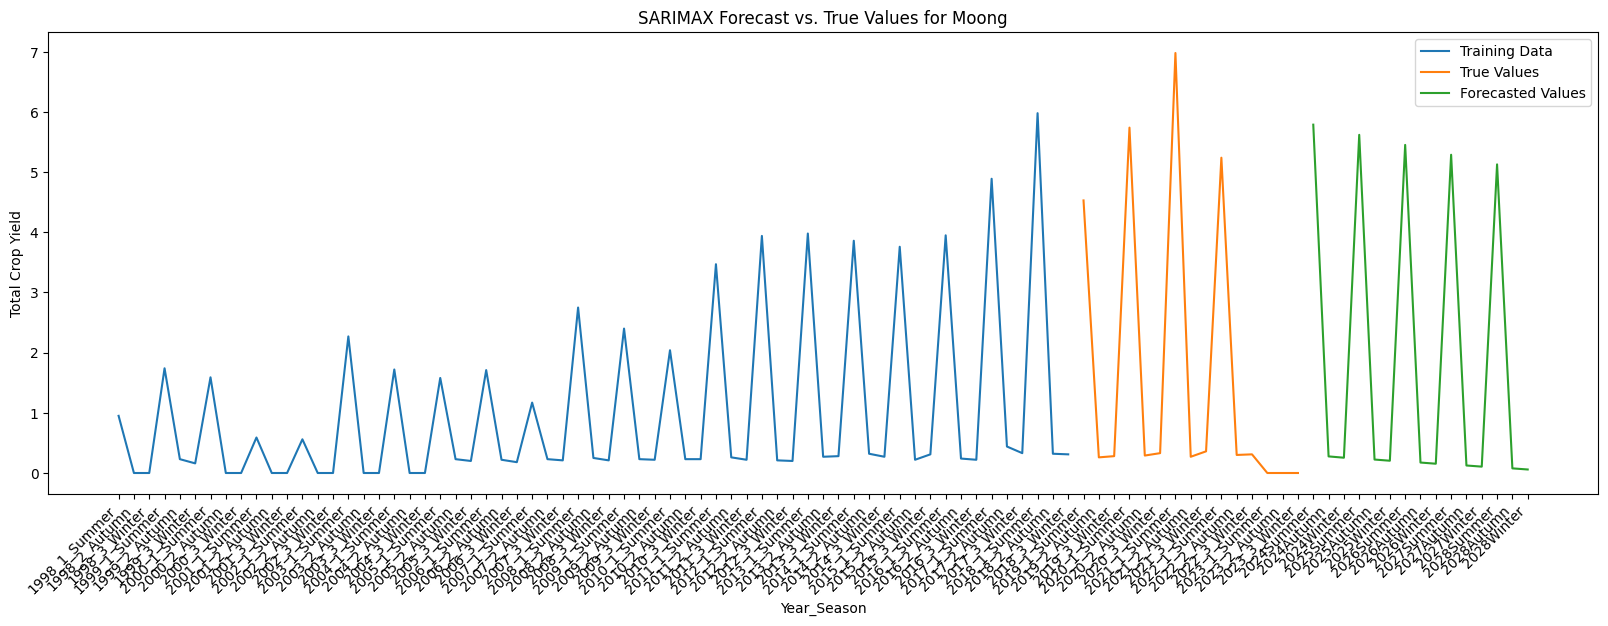

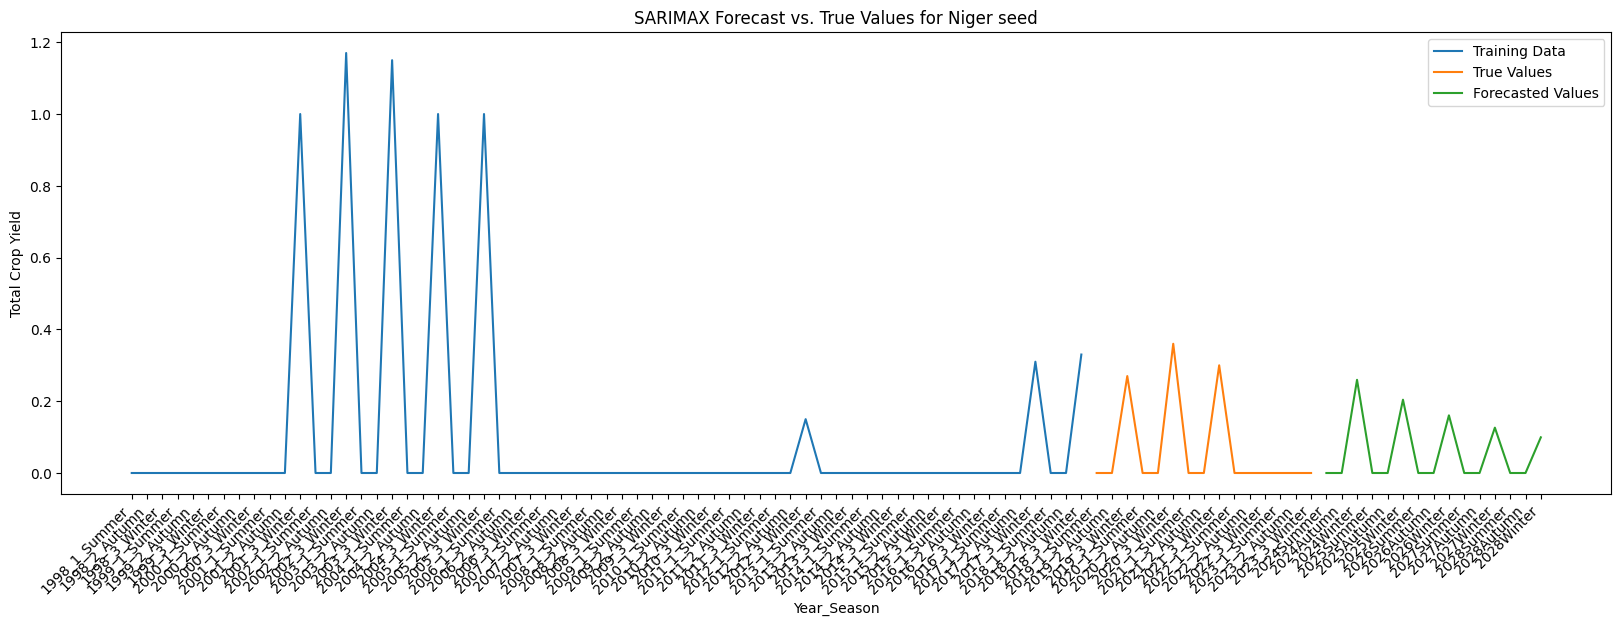

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


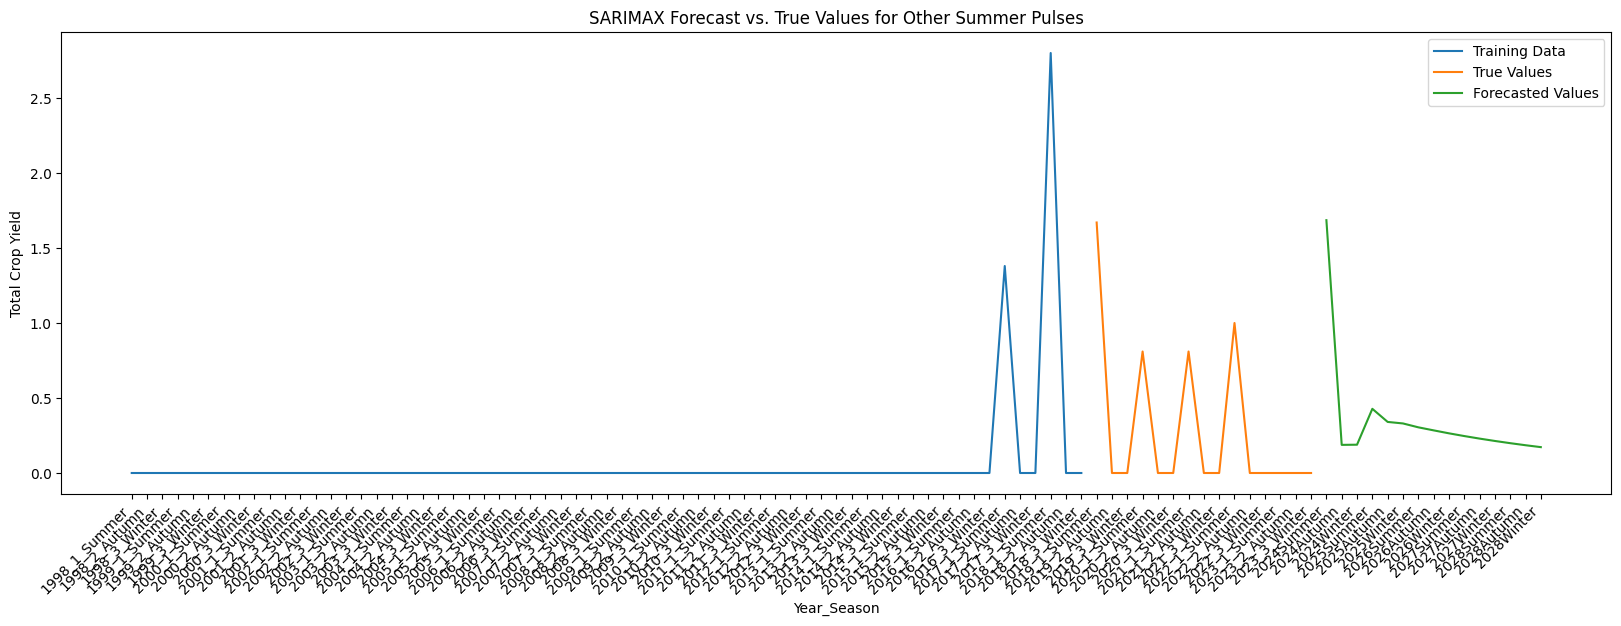

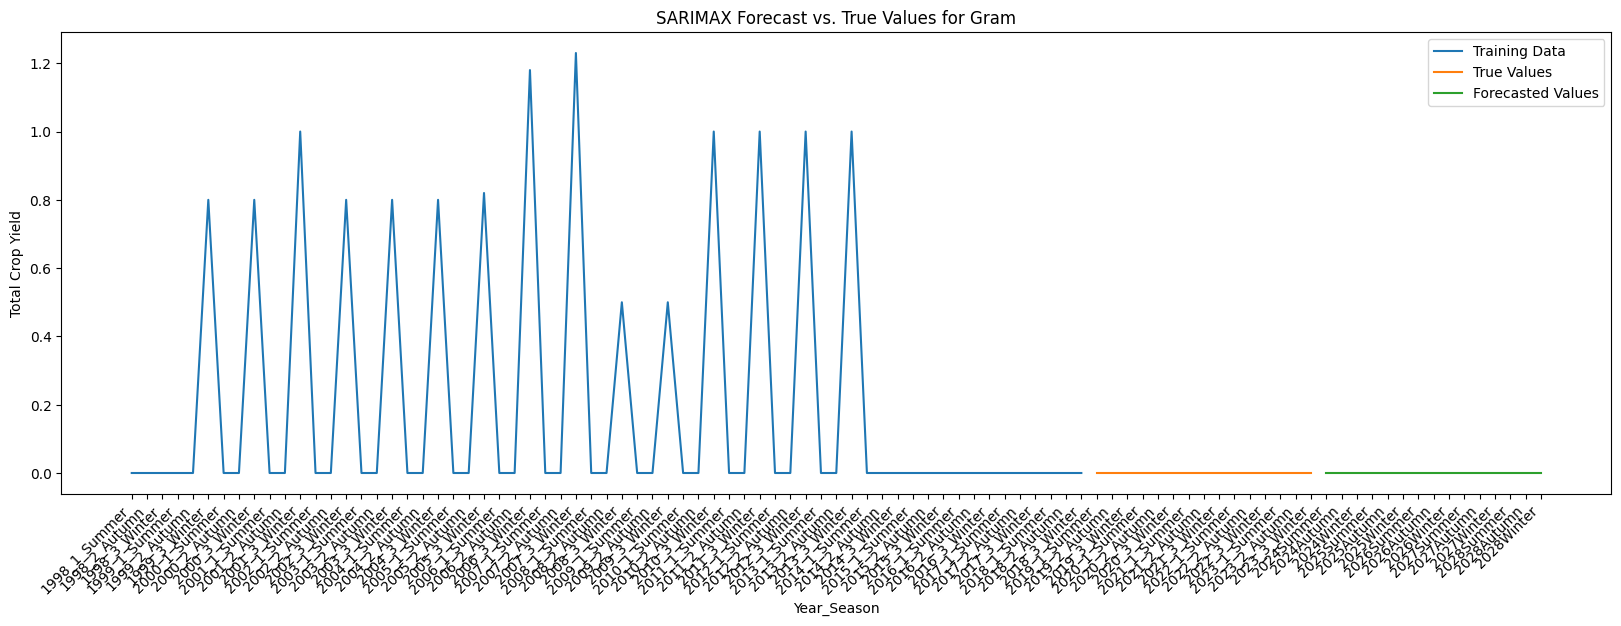

C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Calvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


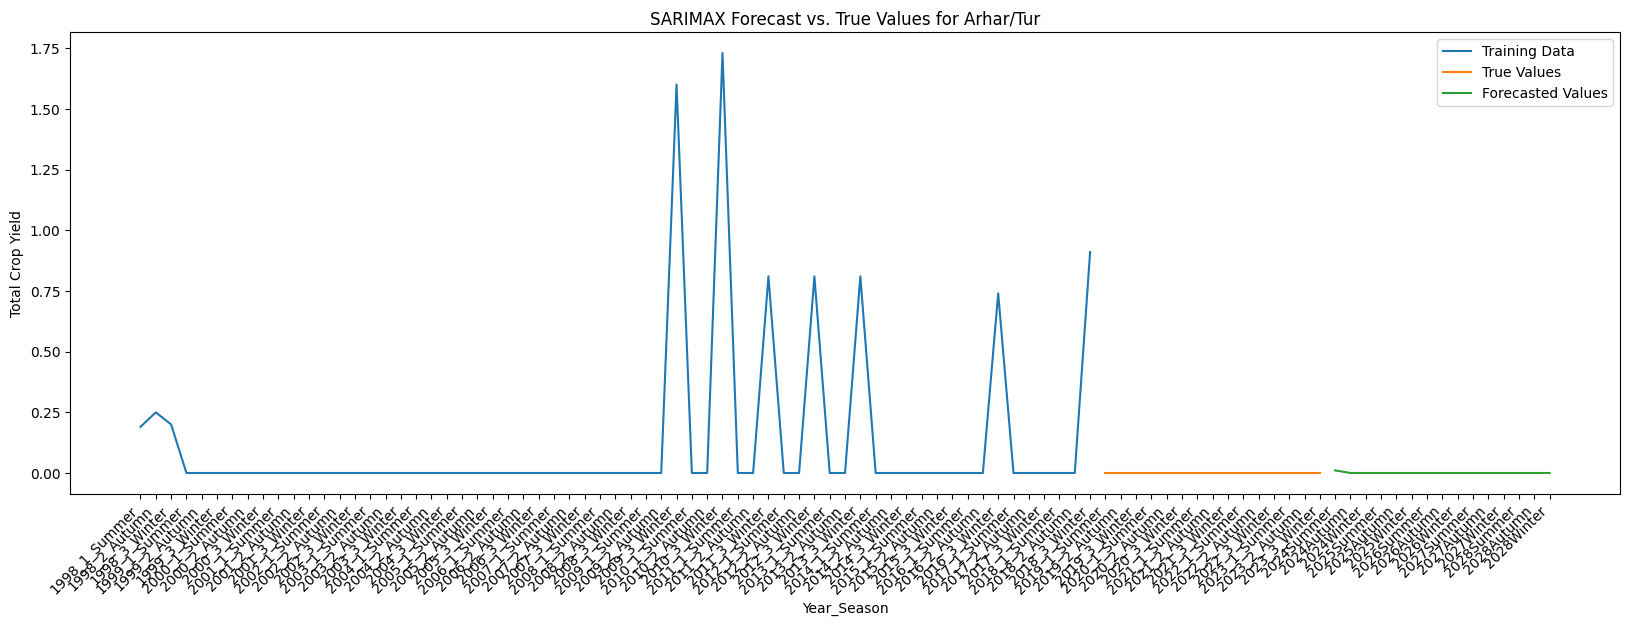

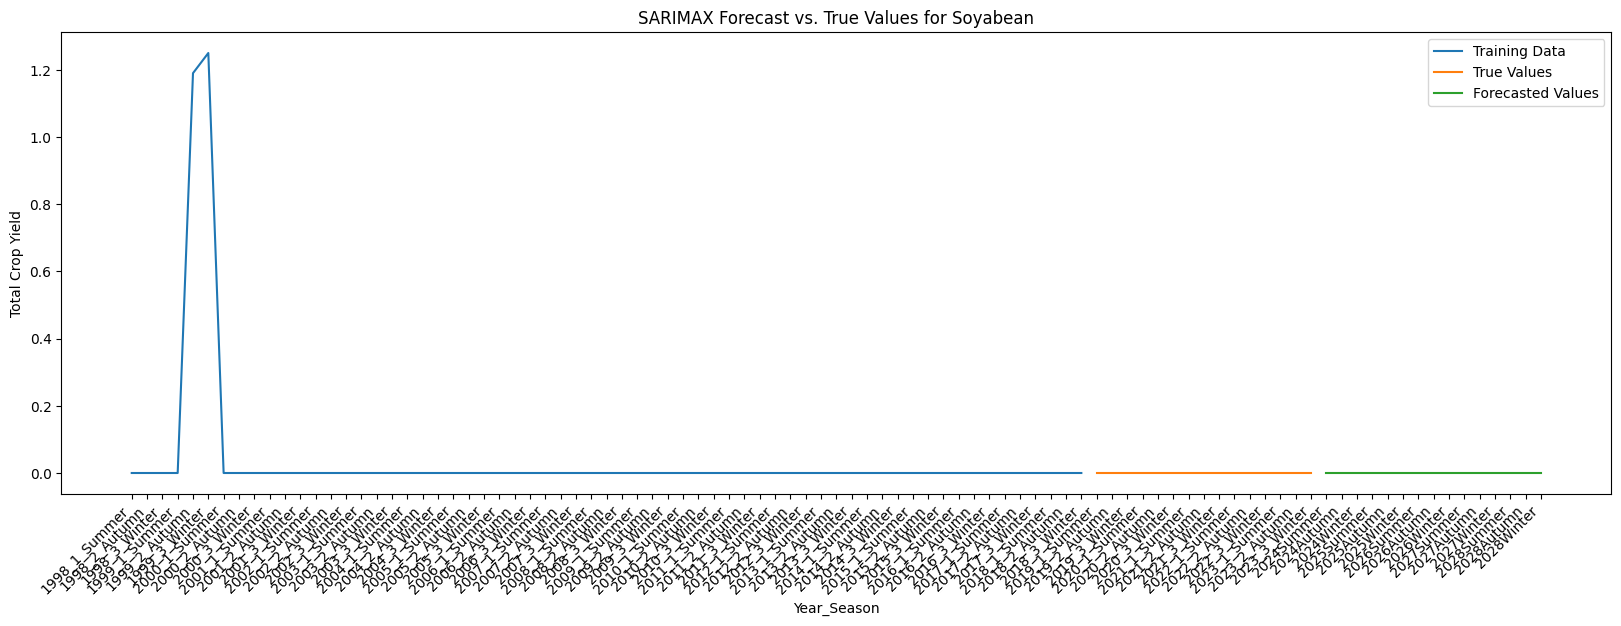

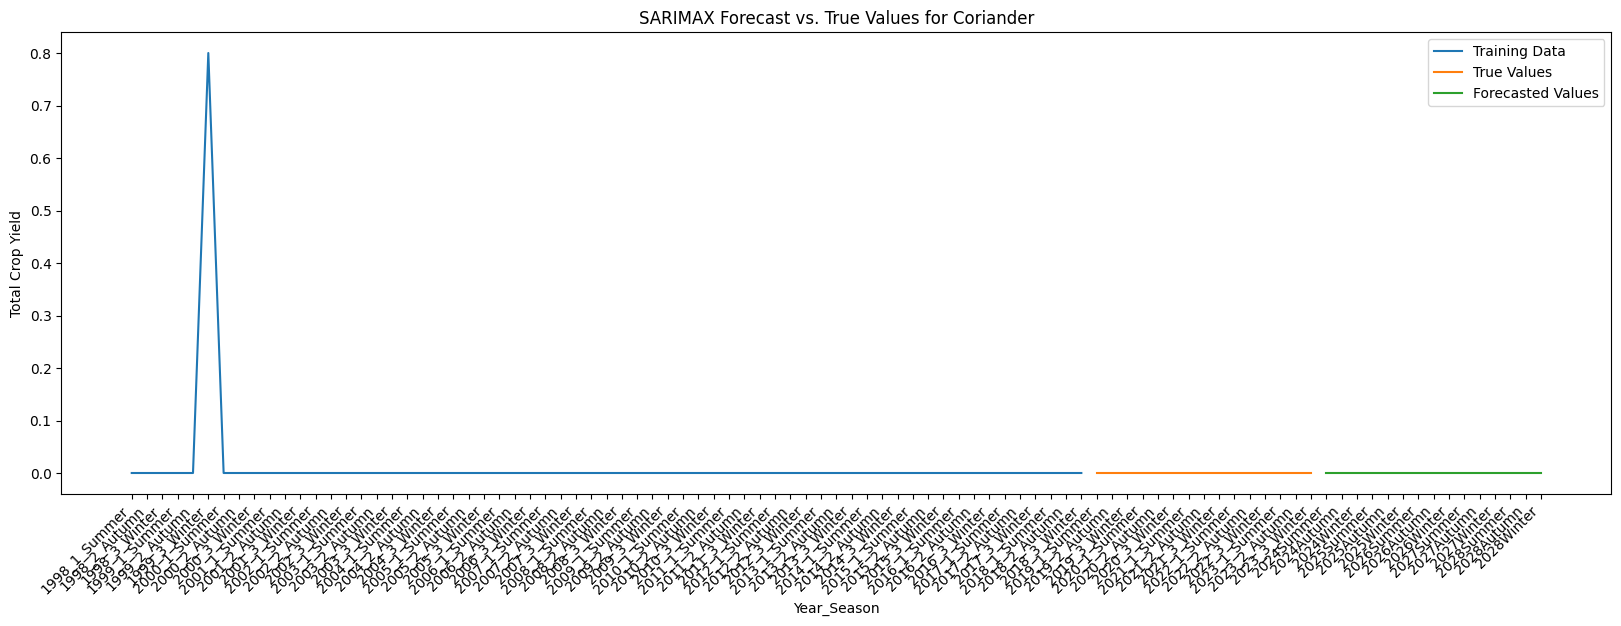

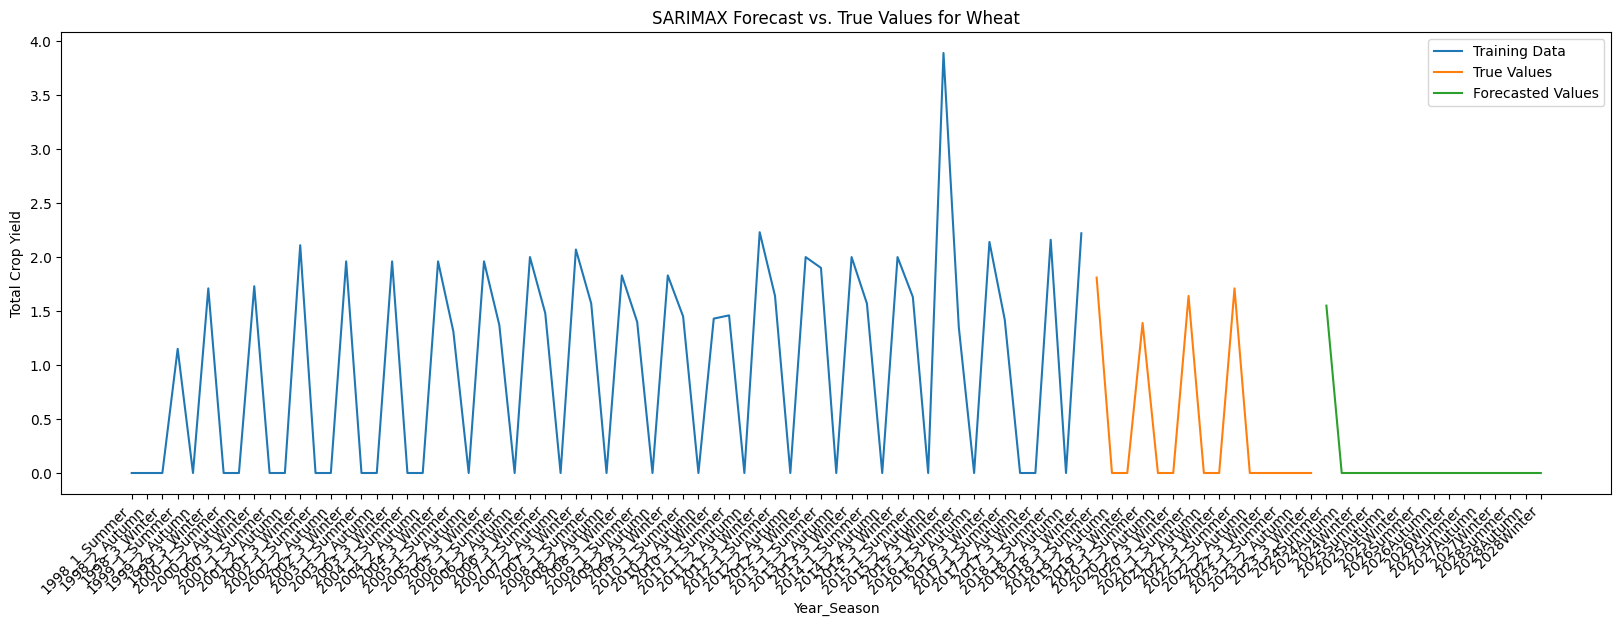

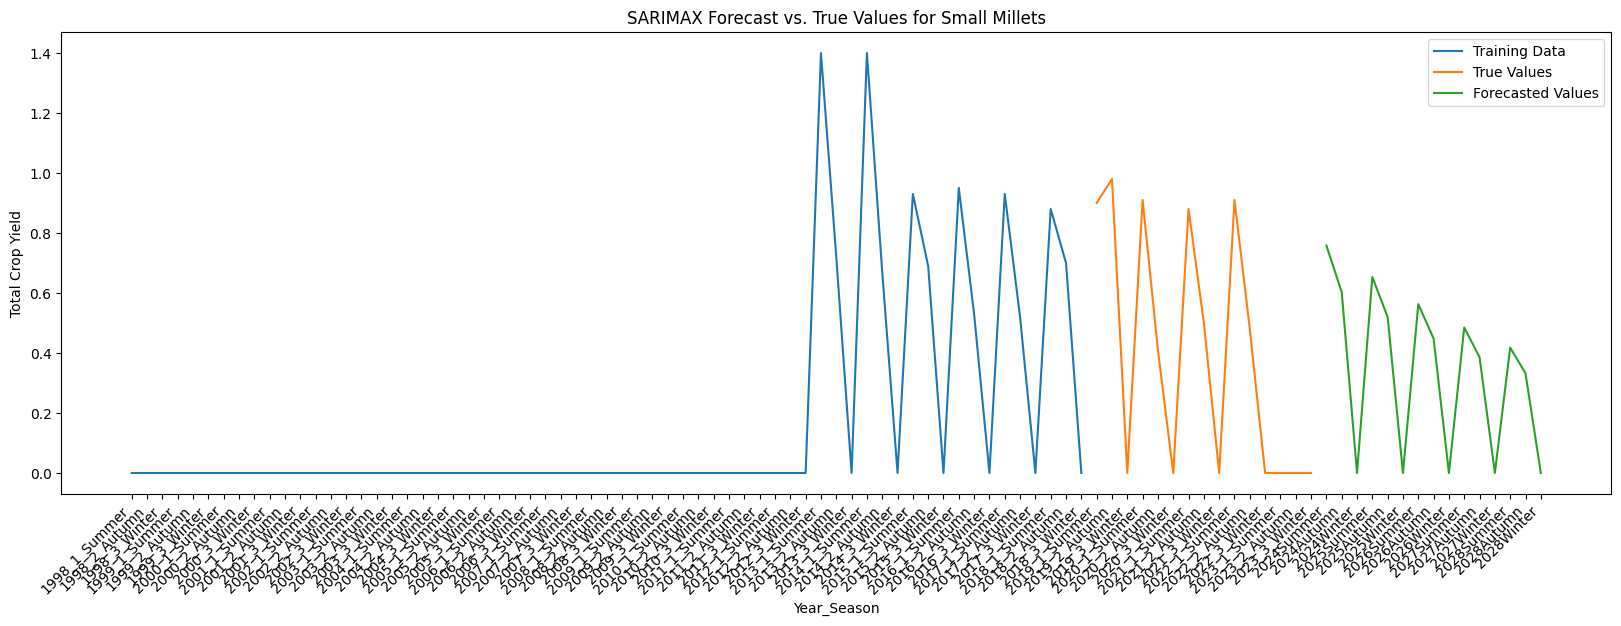

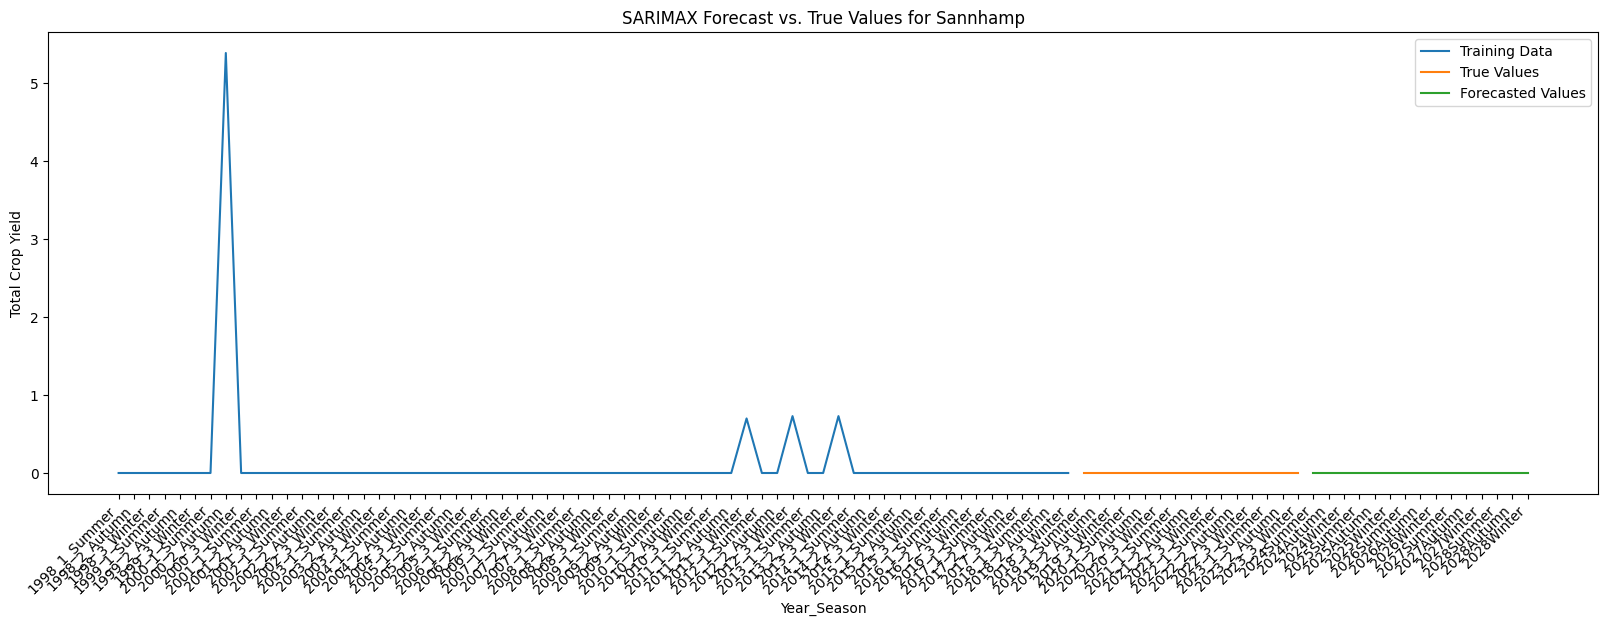

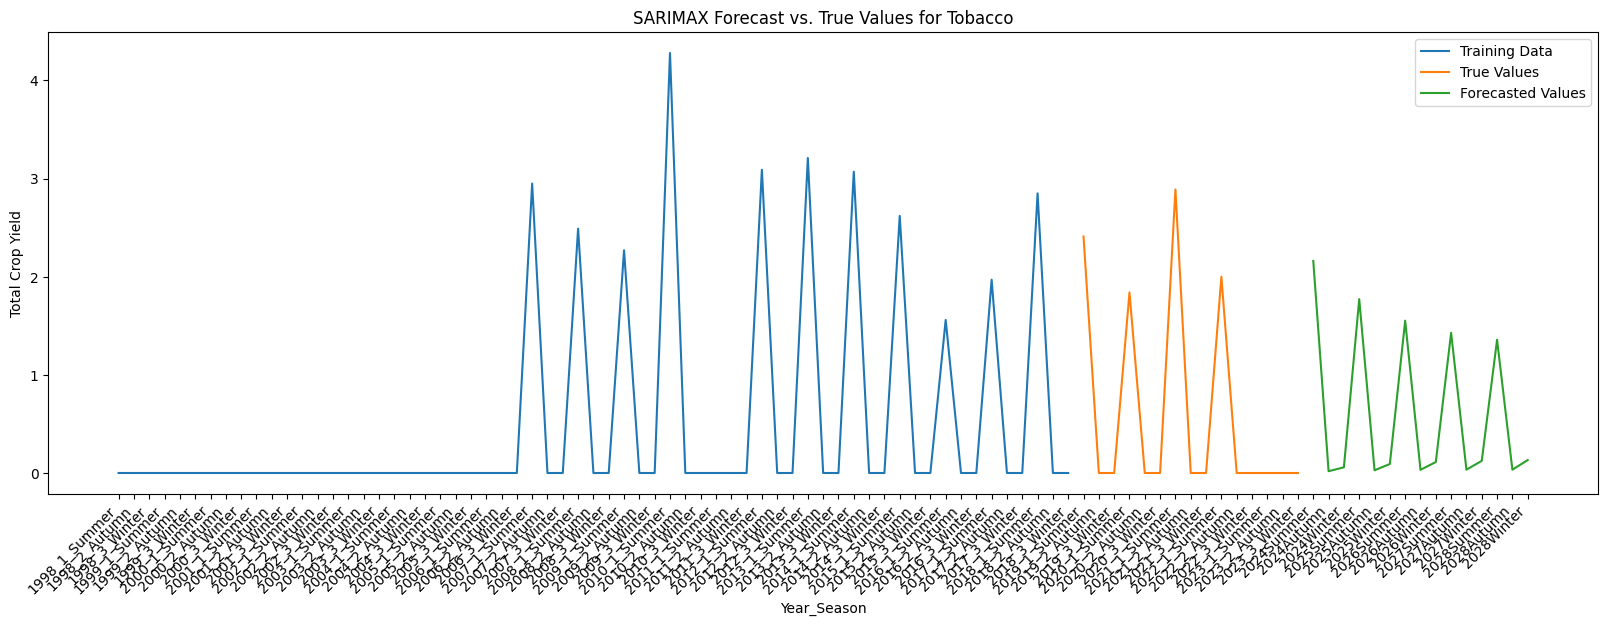

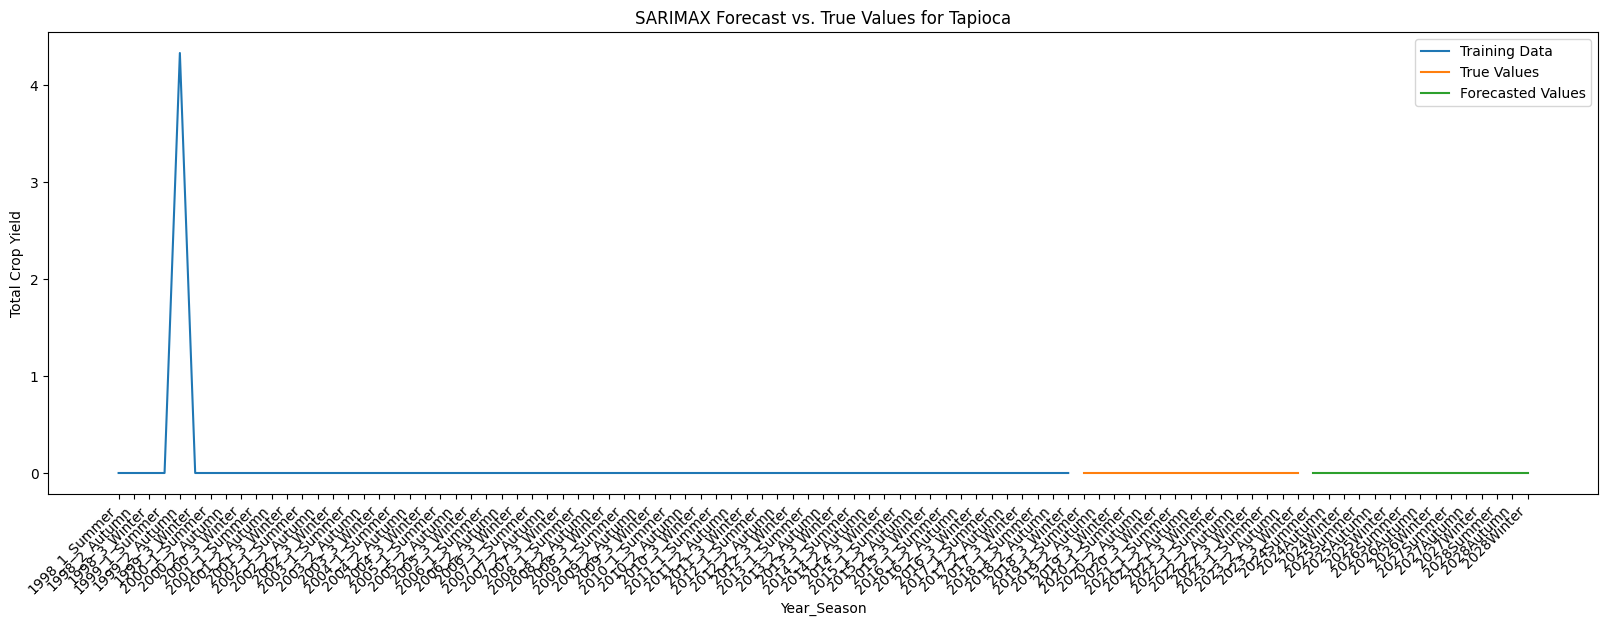

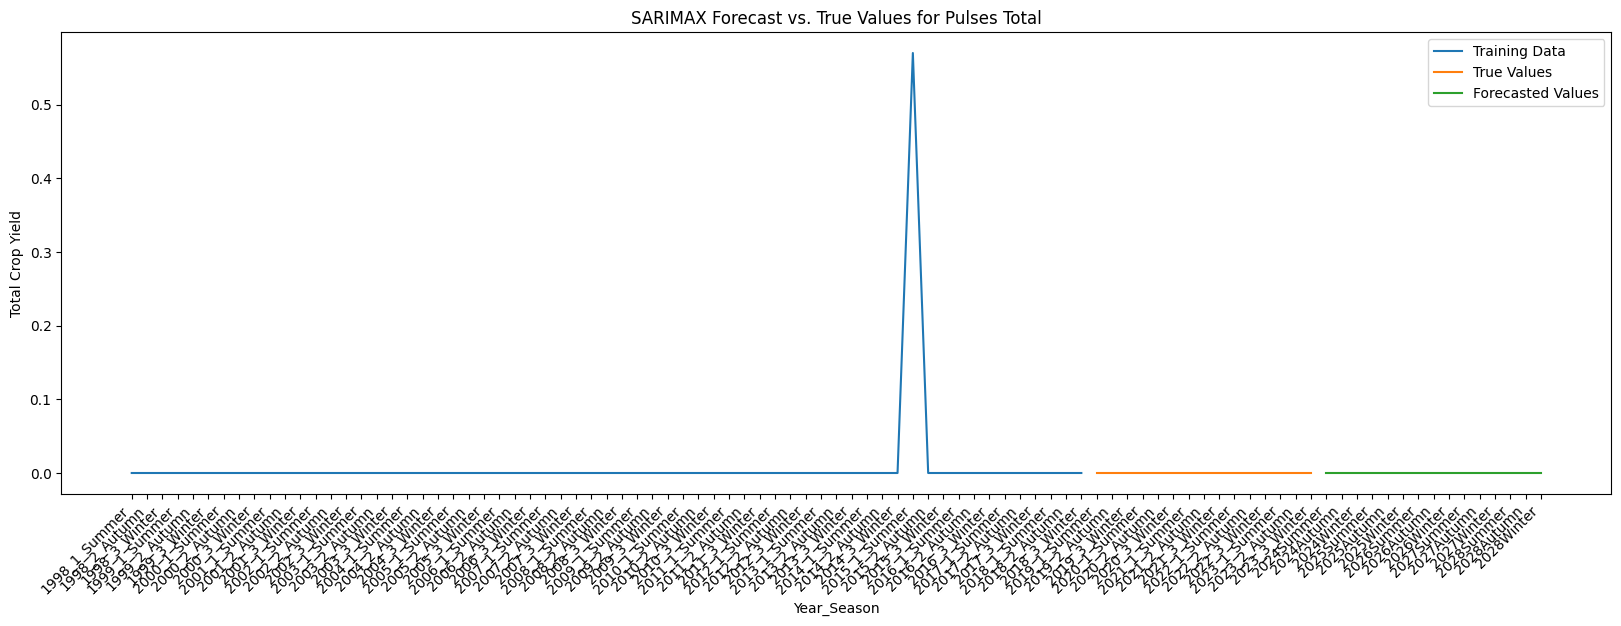

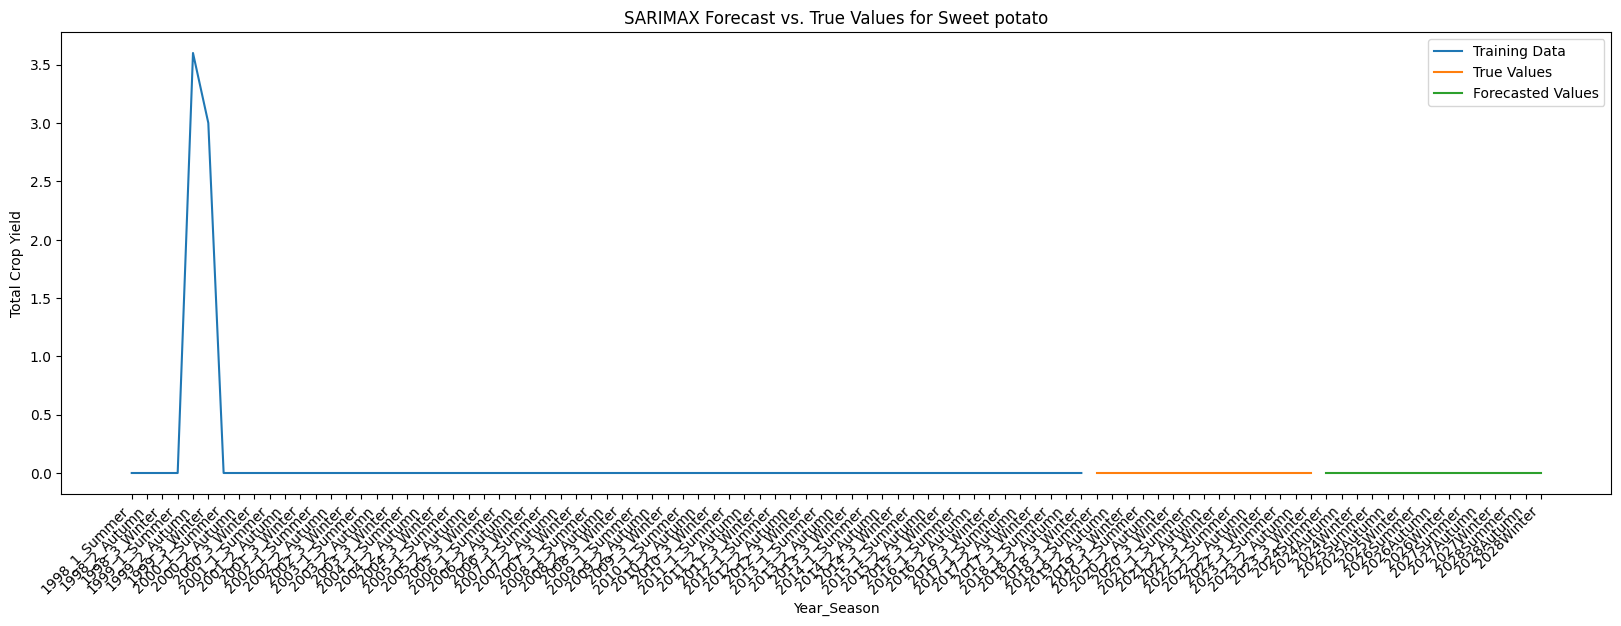

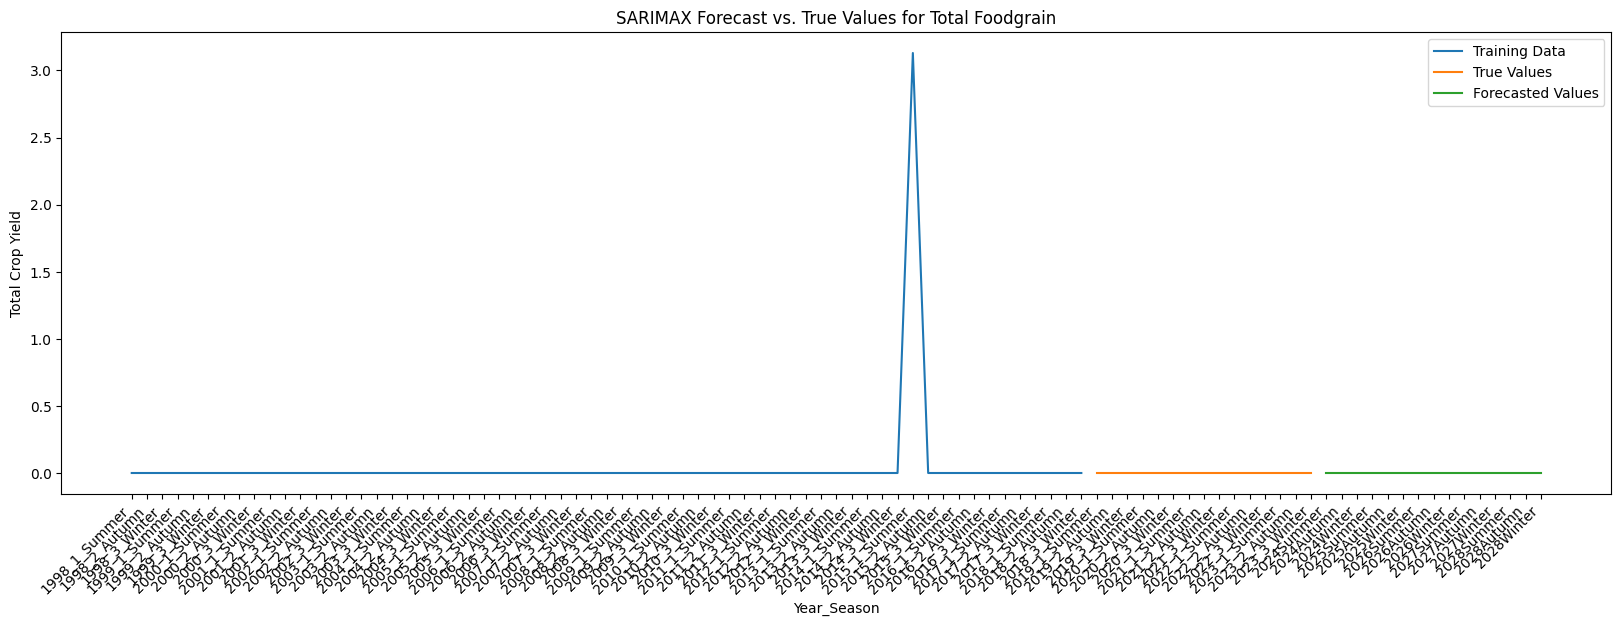

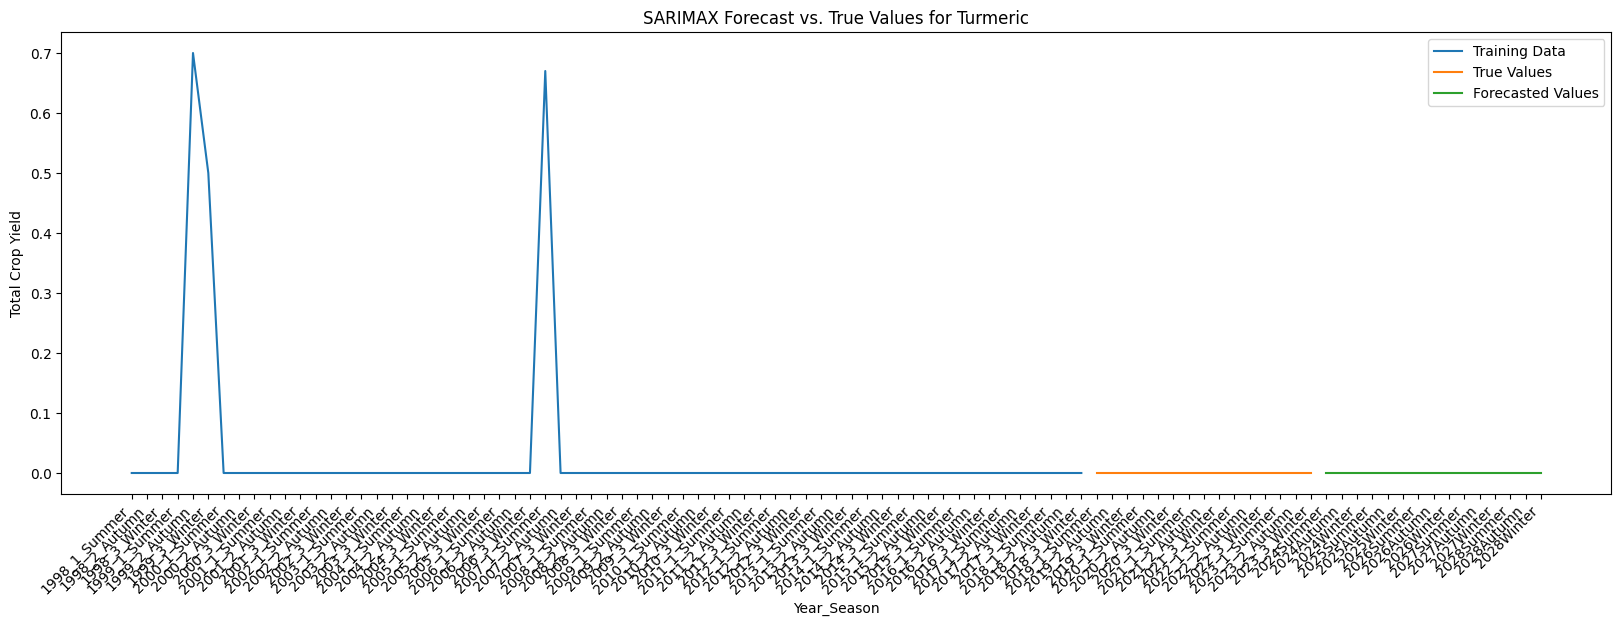

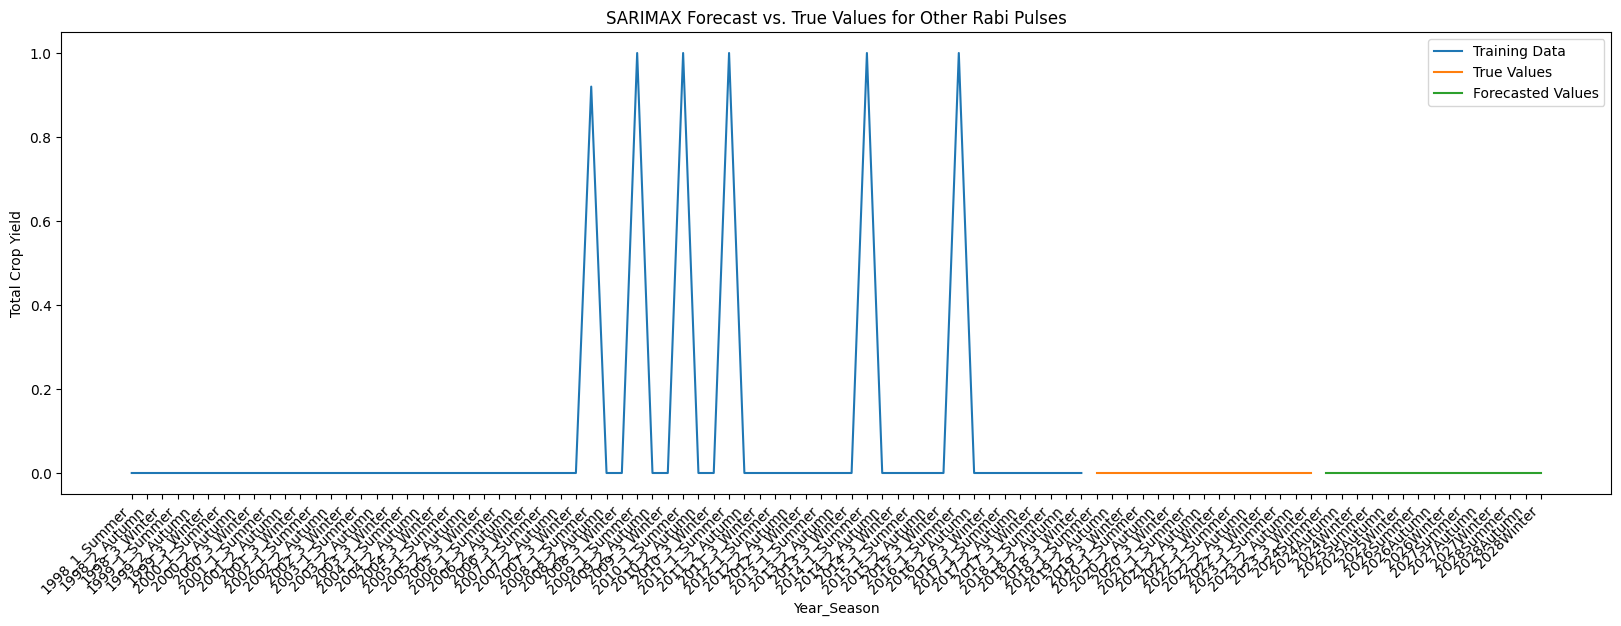

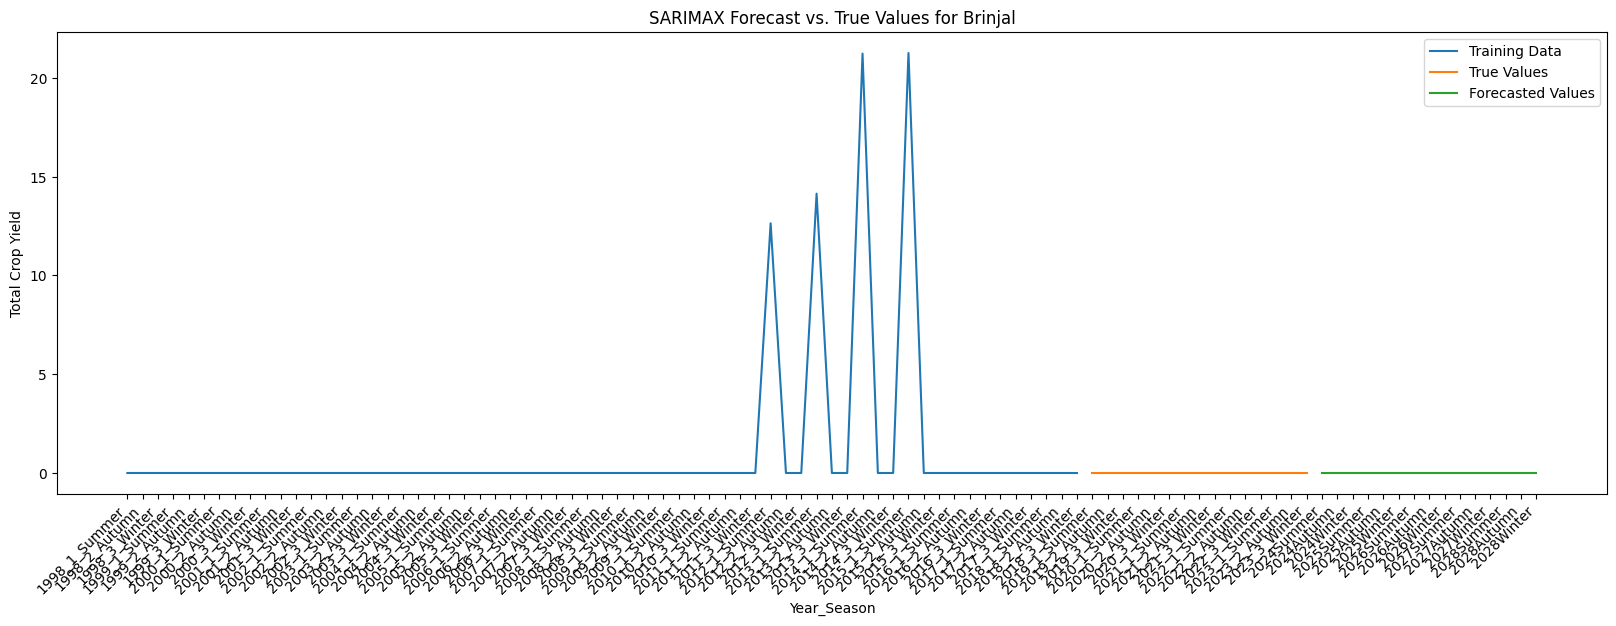

In [5]:
# Forecast up to 2028
forecast_horizon = 15

for crop in crops:    
    crop_data = df[df['crop'] == crop]
    train_data = crop_data[crop_data['year'] <= 2018].groupby(['year_season'])['yield'].sum()
    true_values = crop_data[(crop_data['year'] >= 2019)].groupby(['year_season'])['yield'].sum()
    model = SARIMAX(train_data.values, order=best_params[crop][0], seasonal_order=best_params[crop][1])
    fit_model = model.fit()
    # Forecast with best model for the current crop
    forecast = fit_model.forecast(steps=forecast_horizon)
    forecast_index = []
    for i in range(2024, 2029):
        forecast_index.append(str(i) + 'Summer')
        forecast_index.append(str(i) + 'Autumn')
        forecast_index.append(str(i) + 'Winter')

    # Plotting the results for the current crop
    plt.figure(figsize=(20, 6))
    plt.plot(train_data.index, train_data.values, label='Training Data')
    plt.plot(true_values.index, true_values.values, label='True Values')
    plt.plot(forecast_index, forecast, label='Forecasted Values')
    plt.xlabel('Year_Season')
    plt.ylabel('Total Crop Yield')
    plt.title(f'SARIMAX Forecast vs. True Values for {crop}')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()